In [1]:
!pip install pandas
!pip install matplotlib

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import io



In [4]:
import os

pasta_2020 = '/content/drive/MyDrive/dataverse_files/2020'

try:
    arquivos_na_pasta = os.listdir(pasta_2020)
    print(f"Arquivos encontrados na pasta '{pasta_2020}':")
    for arquivo in arquivos_na_pasta:
        print(arquivo)
except FileNotFoundError:
    print(f"Erro: A pasta '{pasta_2020}' não foi encontrada.")
except Exception as e:
    print(f"Ocorreu um erro ao acessar a pasta: {e}")

Arquivos encontrados na pasta '/content/drive/MyDrive/dataverse_files/2020':
INMET_CO_DF_A001_BRASILIA_01-01-2020_A_31-12-2020.CSV
INMET_CO_GO_A002_GOIANIA_01-01-2020_A_31-12-2020.CSV
INMET_CO_GO_A003_MORRINHOS_01-01-2020_A_31-12-2020.CSV
INMET_CO_GO_A005_PORANGATU_01-01-2020_A_31-12-2020.CSV
INMET_N_TO_A009_PALMAS_01-01-2020_A_31-12-2020.CSV
INMET_N_TO_A010_PARANA_01-01-2020_A_31-12-2020.CSV
INMET_CO_GO_A011_SAO SIMAO_01-01-2020_A_31-12-2020.CSV
INMET_CO_GO_A012_LUZIANIA_01-01-2020_A_31-12-2020.CSV
INMET_CO_GO_A013_ARAGARCAS_01-01-2020_A_31-12-2020.CSV
INMET_CO_GO_A014_GOIAS_01-01-2020_A_31-12-2020.CSV
INMET_CO_GO_A015_ITAPACI_01-01-2020_A_31-12-2020.CSV
INMET_CO_GO_A016_JATAI_01-01-2020_A_31-12-2020.CSV
INMET_CO_GO_A017_POSSE_01-01-2020_A_31-12-2020.CSV
INMET_N_TO_A018_PEIXE_01-01-2020_A_31-12-2020.CSV
INMET_N_TO_A019_GURUPI_01-01-2020_A_31-12-2020.CSV
INMET_N_TO_A020_PEDRO AFONSO_01-01-2020_A_31-12-2020.CSV
INMET_N_TO_A021_ARAGUAINA_01-01-2020_A_31-12-2020.CSV
INMET_CO_GO_A022_GOIAN

In [5]:
import os

pasta = '/content/drive/MyDrive/dataverse_files/2020'

try:
    arquivos = os.listdir(pasta)
    quantidade_arquivos = len(arquivos)

    print(f"Quantidade de arquivos na pasta '{pasta}': {quantidade_arquivos}")
    print("\nLista de arquivos:")
    for arquivo in arquivos:
        print(arquivo)

except FileNotFoundError:
    print(f"Erro: A pasta '{pasta}' não foi encontrada.")
except Exception as e:
    print(f"Ocorreu um erro ao acessar a pasta: {e}")

Quantidade de arquivos na pasta '/content/drive/MyDrive/dataverse_files/2020': 589

Lista de arquivos:
INMET_CO_DF_A001_BRASILIA_01-01-2020_A_31-12-2020.CSV
INMET_CO_GO_A002_GOIANIA_01-01-2020_A_31-12-2020.CSV
INMET_CO_GO_A003_MORRINHOS_01-01-2020_A_31-12-2020.CSV
INMET_CO_GO_A005_PORANGATU_01-01-2020_A_31-12-2020.CSV
INMET_N_TO_A009_PALMAS_01-01-2020_A_31-12-2020.CSV
INMET_N_TO_A010_PARANA_01-01-2020_A_31-12-2020.CSV
INMET_CO_GO_A011_SAO SIMAO_01-01-2020_A_31-12-2020.CSV
INMET_CO_GO_A012_LUZIANIA_01-01-2020_A_31-12-2020.CSV
INMET_CO_GO_A013_ARAGARCAS_01-01-2020_A_31-12-2020.CSV
INMET_CO_GO_A014_GOIAS_01-01-2020_A_31-12-2020.CSV
INMET_CO_GO_A015_ITAPACI_01-01-2020_A_31-12-2020.CSV
INMET_CO_GO_A016_JATAI_01-01-2020_A_31-12-2020.CSV
INMET_CO_GO_A017_POSSE_01-01-2020_A_31-12-2020.CSV
INMET_N_TO_A018_PEIXE_01-01-2020_A_31-12-2020.CSV
INMET_N_TO_A019_GURUPI_01-01-2020_A_31-12-2020.CSV
INMET_N_TO_A020_PEDRO AFONSO_01-01-2020_A_31-12-2020.CSV
INMET_N_TO_A021_ARAGUAINA_01-01-2020_A_31-12-2020.

In [6]:
import pandas as pd
import glob
import os

# Caminho da pasta com os arquivos
pasta_2020 = '/content/drive/MyDrive/dataverse_files/2020'
file_pattern = os.path.join(pasta_2020, '*.CSV')

all_files = glob.glob(file_pattern)
lista_dfs = []
erros_leitura = {}
colunas_nao_encontradas = {}

coluna_radiacao = 'RADIACAO GLOBAL (Kj/m²)'
coluna_chuva = 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'
coluna_temperatura = 'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'

for filename in all_files:
    try:
        # Tenta ler o CSV com os parâmetros corretos
        df = pd.read_csv(filename, encoding='latin1', sep=';', skiprows=8, decimal=',')
        if df.empty:
            df = pd.read_csv(filename, encoding='utf-8', sep=';', skiprows=8, decimal=',')

        if not df.empty and coluna_radiacao in df.columns and coluna_chuva in df.columns and coluna_temperatura in df.columns and 'Data' in df.columns:
            # Seleciona as colunas relevantes
            df_temp = df[['Data', coluna_radiacao, coluna_chuva, coluna_temperatura]].copy()
            df_temp['Arquivo'] = os.path.basename(filename) # Adiciona o nome do arquivo
            # Converte as colunas para numérico
            df_temp[coluna_radiacao] = pd.to_numeric(df_temp[coluna_radiacao], errors='coerce')
            df_temp[coluna_chuva] = pd.to_numeric(df_temp[coluna_chuva], errors='coerce')
            df_temp[coluna_temperatura] = pd.to_numeric(df_temp[coluna_temperatura], errors='coerce')
            lista_dfs.append(df_temp)
        elif not df.empty:
            colunas_faltantes = []
            if coluna_radiacao not in df.columns:
                colunas_faltantes.append(coluna_radiacao)
            if coluna_chuva not in df.columns:
                colunas_faltantes.append(coluna_chuva)
            if coluna_temperatura not in df.columns:
                colunas_faltantes.append(coluna_temperatura)
            if 'Data' not in df.columns:
                colunas_faltantes.append('Data')
            colunas_nao_encontradas[filename] = f"Colunas não encontradas: {', '.join(colunas_faltantes)}"
        else:
            erros_leitura[filename] = "Arquivo vazio ou leitura falhou com parâmetros comuns."

    except Exception as e:
        erros_leitura[filename] = str(e)

# Combina todos os DataFrames lidos com sucesso
if lista_dfs:
    df_final_2020 = pd.concat(lista_dfs, ignore_index=True)
    print(f"Total de arquivos lidos com sucesso (com as 3 colunas): {len(lista_dfs)}")
    print("\nPrimeiras linhas dos dados combinados:")
    print(df_final_2020.head())

    # Exemplo de análise: Média mensal de cada variável
    df_final_2020['Data'] = pd.to_datetime(df_final_2020['Data'], format='%Y/%m/%d', errors='coerce') # Formato da data corrigido
    if 'Data' in df_final_2020.columns:
        media_mensal = df_final_2020.groupby(df_final_2020['Data'].dt.month)[[coluna_radiacao, coluna_chuva, coluna_temperatura]].mean()
        print("\nMédia mensal das variáveis para 2020 (agregado de todas as estações):")
        print(media_mensal)
    else:
        print("Coluna 'Data' não encontrada para realizar a análise mensal.")

else:
    print("Nenhum arquivo CSV continha todas as 3 colunas.")

# Imprime informações sobre arquivos que não foram lidos
if erros_leitura:
    print("\nErros ao ler os seguintes arquivos:")
    for filename, erro in erros_leitura.items():
        print(f"- {filename}: {erro}")

# Imprime informações sobre arquivos onde as colunas não foram encontradas
if colunas_nao_encontradas:
    print("\nColunas não encontradas nos seguintes arquivos:")
    for filename, motivo in colunas_nao_encontradas.items():
        print(f"- {filename}: {motivo}")

Total de arquivos lidos com sucesso (com as 3 colunas): 589

Primeiras linhas dos dados combinados:
         Data  RADIACAO GLOBAL (Kj/m²)  PRECIPITAÇÃO TOTAL, HORÁRIO (mm)  \
0  2020/01/01                      NaN                               0.0   
1  2020/01/01                      NaN                               0.0   
2  2020/01/01                      NaN                               0.0   
3  2020/01/01                      NaN                               0.0   
4  2020/01/01                      NaN                               0.0   

   TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)  \
0                                          20.0   
1                                          19.5   
2                                          20.0   
3                                          19.5   
4                                          19.5   

                                             Arquivo  
0  INMET_CO_DF_A001_BRASILIA_01-01-2020_A_31-12-2...  
1  INMET_CO_DF_A001_BRASIL

In [7]:
import pandas as pd
import glob
import os

# Caminho da pasta com os arquivos
pasta_2020 = '/content/drive/MyDrive/dataverse_files/2020'
file_pattern = os.path.join(pasta_2020, '*.CSV')

all_files = glob.glob(file_pattern)
lista_dfs = []
erros_leitura = {}
colunas_nao_encontradas = {}

coluna_radiacao = 'RADIACAO GLOBAL (Kj/m²)'
coluna_chuva = 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'
coluna_temperatura = 'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'

for filename in all_files:
    try:
        # Tenta ler o CSV com os parâmetros corretos
        df = pd.read_csv(filename, encoding='latin1', sep=';', skiprows=8, decimal=',')
        if df.empty:
            df = pd.read_csv(filename, encoding='utf-8', sep=';', skiprows=8, decimal=',')

        if not df.empty and coluna_radiacao in df.columns and coluna_chuva in df.columns and coluna_temperatura in df.columns and 'Data' in df.columns:
            # Seleciona as colunas relevantes
            df_temp = df[['Data', coluna_radiacao, coluna_chuva, coluna_temperatura]].copy()
            # Converte as colunas para numérico
            df_temp[coluna_radiacao] = pd.to_numeric(df_temp[coluna_radiacao], errors='coerce')
            df_temp[coluna_chuva] = pd.to_numeric(df_temp[coluna_chuva], errors='coerce')
            df_temp[coluna_temperatura] = pd.to_numeric(df_temp[coluna_temperatura], errors='coerce')
            lista_dfs.append(df_temp)
        elif not df.empty:
            colunas_faltantes = []
            if coluna_radiacao not in df.columns:
                colunas_faltantes.append(coluna_radiacao)
            if coluna_chuva not in df.columns:
                colunas_faltantes.append(coluna_chuva)
            if coluna_temperatura not in df.columns:
                colunas_faltantes.append(coluna_temperatura)
            if 'Data' not in df.columns:
                colunas_faltantes.append('Data')
            colunas_nao_encontradas[filename] = f"Colunas não encontradas: {', '.join(colunas_faltantes)}"
        else:
            erros_leitura[filename] = "Arquivo vazio ou leitura falhou com parâmetros comuns."

    except Exception as e:
        erros_leitura[filename] = str(e)

# Combina todos os DataFrames lidos com sucesso
if lista_dfs:
    df_final_2020 = pd.concat(lista_dfs, ignore_index=True)
    df_final_2020['Data'] = pd.to_datetime(df_final_2020['Data'], format='%Y/%m/%d', errors='coerce')

    if 'Data' in df_final_2020.columns:
        media_mensal_2020 = df_final_2020.groupby(df_final_2020['Data'].dt.month)[[coluna_radiacao, coluna_chuva, coluna_temperatura]].mean().reset_index()
        media_mensal_2020['Ano'] = 2020  # Adiciona a coluna do ano
        media_mensal_2020.rename(columns={'Data': 'Mês'}, inplace=True) # Renomeia a coluna para 'Mês'

        # Salva o DataFrame com as médias mensais em um arquivo CSV
        nome_arquivo_saida_2020 = '/content/drive/MyDrive/medias_mensais_2020.csv'
        media_mensal_2020.to_csv(nome_arquivo_saida_2020, index=False)
        print(f"\nMédias mensais de 2020 salvas com sucesso em: {nome_arquivo_saida_2020}")

    else:
        print("Coluna 'Data' não encontrada para realizar a análise mensal e salvar.")

else:
    print("Nenhum arquivo CSV continha todas as 3 colunas para análise.")

# Imprime informações sobre arquivos que não foram lidos
if erros_leitura:
    print("\nErros ao ler os seguintes arquivos:")
    for filename, erro in erros_leitura.items():
        print(f"- {filename}: {erro}")

# Imprime informações sobre arquivos onde as colunas não foram encontradas
if colunas_nao_encontradas:
    print("\nColunas não encontradas nos seguintes arquivos:")
    for filename, motivo in colunas_nao_encontradas.items():
        print(f"- {filename}: {motivo}")


Médias mensais de 2020 salvas com sucesso em: /content/drive/MyDrive/medias_mensais_2020.csv


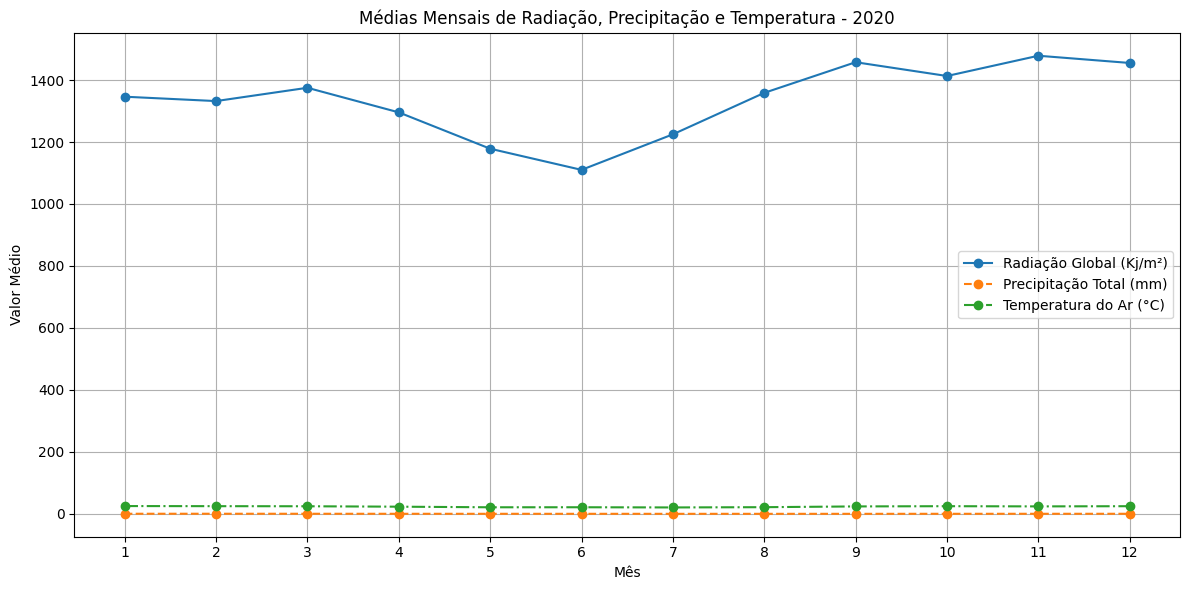

In [8]:

import matplotlib.pyplot as plt

# Caminho do arquivo CSV que contém as médias mensais
caminho_arquivo = '/content/drive/MyDrive/medias_mensais_2020.csv'

try:
    # Ler o arquivo CSV
    df_medias = pd.read_csv(caminho_arquivo)

    # Definir o mês como índice para facilitar a plotagem
    df_medias.set_index('Mês', inplace=True)

    # Criar o gráfico de linhas
    plt.figure(figsize=(12, 6))

    # Plotar a radiação global
    plt.plot(df_medias.index, df_medias['RADIACAO GLOBAL (Kj/m²)'], marker='o', label='Radiação Global (Kj/m²)')

    # Plotar a precipitação total
    plt.plot(df_medias.index, df_medias['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'], marker='o', linestyle='--', label='Precipitação Total (mm)')

    # Plotar a temperatura do ar
    plt.plot(df_medias.index, df_medias['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'], marker='o', linestyle='-.', label='Temperatura do Ar (°C)')

    # Adicionar título e rótulos aos eixos
    plt.title('Médias Mensais de Radiação, Precipitação e Temperatura - 2020')
    plt.xlabel('Mês')
    plt.ylabel('Valor Médio')
    plt.xticks(df_medias.index) # Mostrar todos os meses no eixo x
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print(f"Erro: O arquivo '{caminho_arquivo}' não foi encontrado.")
except KeyError as e:
    print(f"Erro: A coluna '{e}' não foi encontrada no arquivo CSV.")
except Exception as e:
    print(f"Ocorreu um erro ao gerar o gráfico: {e}")

In [9]:

import glob
import os

# Caminho da pasta com os arquivos de 2020
pasta_2020 = '/content/drive/MyDrive/dataverse_files/2020'
file_pattern = os.path.join(pasta_2020, '*.CSV')

all_files = glob.glob(file_pattern)
lista_dfs = []
erros_leitura = {}
colunas_nao_encontradas = {}

coluna_radiacao = 'RADIACAO GLOBAL (Kj/m²)'
coluna_precipitacao = 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'
coluna_temp_max = 'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'
coluna_temp_min = 'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)'

for filename in all_files:
    try:
        # Tenta ler o CSV com os parâmetros corretos
        df = pd.read_csv(filename, encoding='latin1', sep=';', skiprows=8, decimal=',')
        if df.empty:
            df = pd.read_csv(filename, encoding='utf-8', sep=';', skiprows=8, decimal=',')

        colunas_presentes = df.columns.tolist()

        if not df.empty and coluna_radiacao in colunas_presentes and coluna_precipitacao in colunas_presentes and coluna_temp_max in colunas_presentes and coluna_temp_min in colunas_presentes and 'Data' in colunas_presentes:
            # Seleciona as colunas relevantes
            df_temp = df[['Data', coluna_radiacao, coluna_precipitacao, coluna_temp_max, coluna_temp_min]].copy()
            # Converte as colunas para numérico
            df_temp[coluna_radiacao] = pd.to_numeric(df_temp[coluna_radiacao], errors='coerce')
            df_temp[coluna_precipitacao] = pd.to_numeric(df_temp[coluna_precipitacao], errors='coerce')
            df_temp[coluna_temp_max] = pd.to_numeric(df_temp[coluna_temp_max], errors='coerce')
            df_temp[coluna_temp_min] = pd.to_numeric(df_temp[coluna_temp_min], errors='coerce')
            lista_dfs.append(df_temp)
        elif not df.empty:
            colunas_faltantes = []
            if coluna_radiacao not in colunas_presentes:
                colunas_faltantes.append(coluna_radiacao)
            if coluna_precipitacao not in colunas_presentes:
                colunas_faltantes.append(coluna_precipitacao)
            if coluna_temp_max not in colunas_presentes:
                colunas_faltantes.append(coluna_temp_max)
            if coluna_temp_min not in colunas_presentes:
                colunas_faltantes.append(coluna_temp_min)
            if 'Data' not in colunas_presentes:
                colunas_faltantes.append('Data')
            colunas_nao_encontradas[filename] = f"Colunas não encontradas: {', '.join(colunas_faltantes)}"
        else:
            erros_leitura[filename] = "Arquivo vazio ou leitura falhou com parâmetros comuns."

    except Exception as e:
        erros_leitura[filename] = str(e)

# Combina todos os DataFrames lidos com sucesso
if lista_dfs:
    df_final_2020 = pd.concat(lista_dfs, ignore_index=True)
    df_final_2020['Data'] = pd.to_datetime(df_final_2020['Data'], format='%Y/%m/%d', errors='coerce')

    if 'Data' in df_final_2020.columns:
        media_mensal_2020 = df_final_2020.groupby(df_final_2020['Data'].dt.month)[[coluna_radiacao, coluna_precipitacao, coluna_temp_max, coluna_temp_min]].mean().reset_index()
        media_mensal_2020['Ano'] = 2020  # Adiciona a coluna do ano
        media_mensal_2020.rename(columns={'Data': 'Mês'}, inplace=True) # Renomeia a coluna para 'Mês'

        # Salva o DataFrame com as médias mensais em um arquivo CSV (novo nome para não sobrescrever)
        nome_arquivo_saida_2020_v2 = '/content/drive/MyDrive/medias_mensais_2020_v2.csv'
        media_mensal_2020.to_csv(nome_arquivo_saida_2020_v2, index=False)
        print(f"\nMédias mensais de 2020 (com temp. max e min) salvas com sucesso em: {nome_arquivo_saida_2020_v2}")

    else:
        print("Coluna 'Data' não encontrada para realizar a análise mensal e salvar.")

else:
    print("Nenhum arquivo CSV continha todas as colunas necessárias para análise.")

# Imprime informações sobre arquivos que não foram lidos
if erros_leitura:
    print("\nErros ao ler os seguintes arquivos:")
    for filename, erro in erros_leitura.items():
        print(f"- {filename}: {erro}")

# Imprime informações sobre arquivos onde as colunas não foram encontradas
if colunas_nao_encontradas:
    print("\nColunas não encontradas nos seguintes arquivos:")
    for filename, motivo in colunas_nao_encontradas.items():
        print(f"- {filename}: {motivo}")


Médias mensais de 2020 (com temp. max e min) salvas com sucesso em: /content/drive/MyDrive/medias_mensais_2020_v2.csv


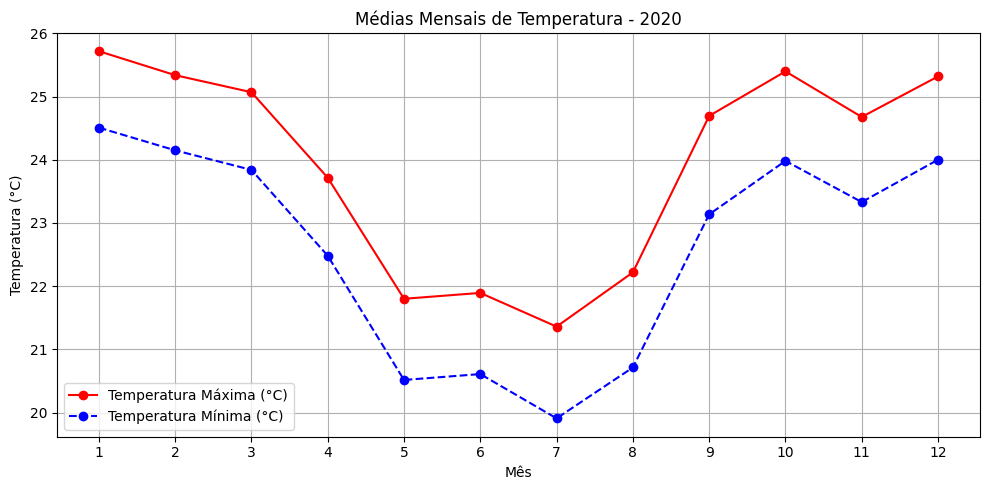

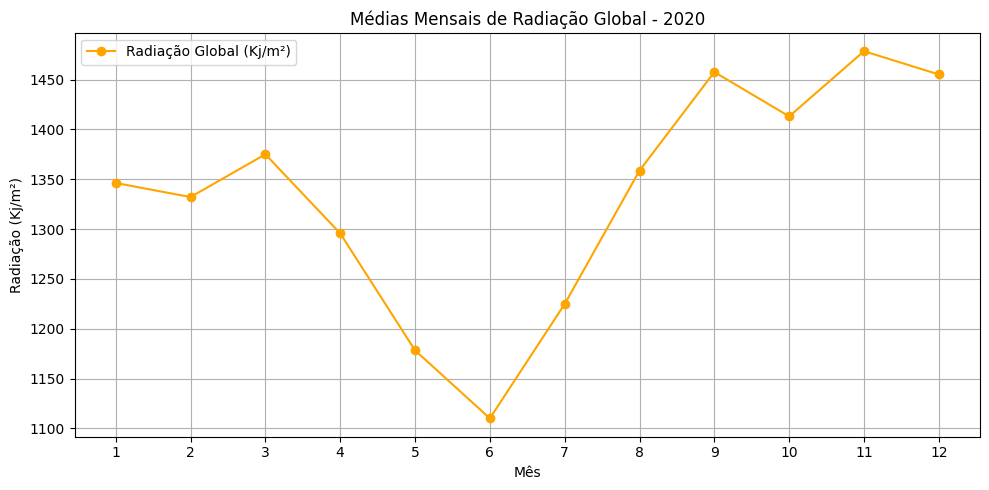

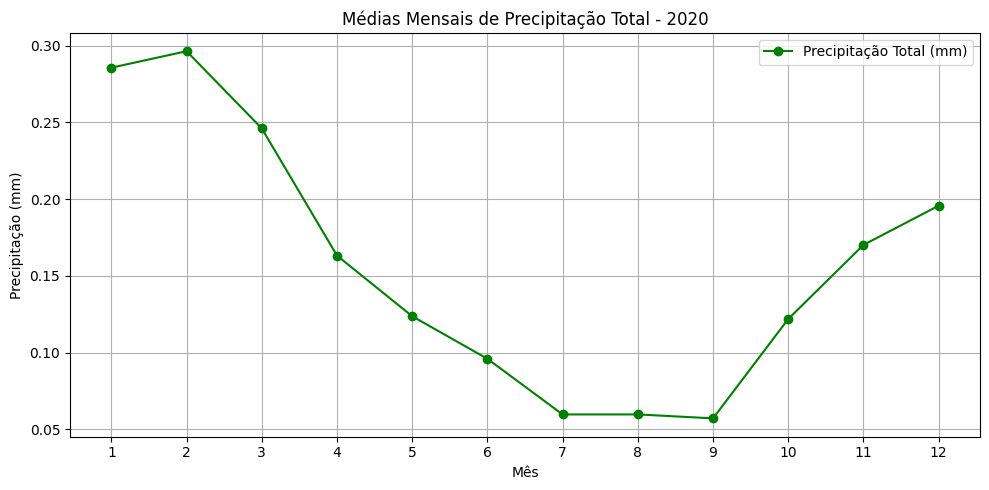

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Caminho do arquivo CSV com as médias mensais atualizado
caminho_arquivo = '/content/drive/MyDrive/medias_mensais_2020_v2.csv'

try:
    # Ler o arquivo CSV
    df_medias = pd.read_csv(caminho_arquivo)

    # Definir o mês como índice para facilitar a plotagem
    df_medias.set_index('Mês', inplace=True)

    # --- Gráfico de Temperatura ---
    plt.figure(figsize=(10, 5))
    plt.plot(df_medias.index, df_medias['TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'], marker='o', label='Temperatura Máxima (°C)', color='red')
    plt.plot(df_medias.index, df_medias['TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)'], marker='o', linestyle='--', label='Temperatura Mínima (°C)', color='blue')
    plt.title('Médias Mensais de Temperatura - 2020')
    plt.xlabel('Mês')
    plt.ylabel('Temperatura (°C)')
    plt.xticks(df_medias.index)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # --- Gráfico de Radiação ---
    plt.figure(figsize=(10, 5))
    plt.plot(df_medias.index, df_medias['RADIACAO GLOBAL (Kj/m²)'], marker='o', color='orange', label='Radiação Global (Kj/m²)')
    plt.title('Médias Mensais de Radiação Global - 2020')
    plt.xlabel('Mês')
    plt.ylabel('Radiação (Kj/m²)')
    plt.xticks(df_medias.index)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # --- Gráfico de Precipitação ---
    plt.figure(figsize=(10, 5))
    plt.plot(df_medias.index, df_medias['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'], marker='o', color='green', label='Precipitação Total (mm)')
    plt.title('Médias Mensais de Precipitação Total - 2020')
    plt.xlabel('Mês')
    plt.ylabel('Precipitação (mm)')
    plt.xticks(df_medias.index)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print(f"Erro: O arquivo '{caminho_arquivo}' não foi encontrado.")
except KeyError as e:
    print(f"Erro: A coluna '{e}' não foi encontrada no arquivo CSV.")
except Exception as e:
    print(f"Ocorreu um erro ao gerar os gráficos: {e}")

inmet 2021


In [10]:

import glob
import os
import csv

# Caminho da pasta com os arquivos de 2020
pasta_2020 = '/content/drive/MyDrive/dataverse_files/2020'
file_pattern = os.path.join(pasta_2020, '*.CSV')

all_files = glob.glob(file_pattern)
lista_dfs = []
erros_leitura = {}
colunas_nao_encontradas = {}

coluna_radiacao = 'RADIACAO GLOBAL (Kj/m²)'
coluna_precipitacao = 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'
coluna_temp_max = 'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'
coluna_temp_min = 'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)'

for filename in all_files:
    estado = 'Desconhecido'
    regiao = 'Desconhecido'
    try:
        with open(filename, 'r', encoding='latin1') as arquivo:
            leitor = csv.reader(arquivo, delimiter=';')
            for i, linha in enumerate(leitor):
                if len(linha) == 2:
                    if linha[0] == 'REGIAO:':
                        regiao = linha[1]
                    elif linha[0] == 'UF:':
                        estado = linha[1]
                if i >= 7:  # Assume que as infos de região/UF estão nas primeiras 8 linhas
                    break

        # Tenta ler o CSV com pandas, pulando as linhas de metadados
        df = pd.read_csv(filename, encoding='latin1', sep=';', skiprows=8, decimal=',')
        if df.empty:
            df = pd.read_csv(filename, encoding='utf-8', sep=';', skiprows=8, decimal=',')

        colunas_presentes = df.columns.tolist()

        if not df.empty and coluna_radiacao in colunas_presentes and coluna_precipitacao in colunas_presentes and coluna_temp_max in colunas_presentes and coluna_temp_min in colunas_presentes and 'Data' in colunas_presentes:
            # Seleciona as colunas relevantes
            df_temp = df[['Data', coluna_radiacao, coluna_precipitacao, coluna_temp_max, coluna_temp_min]].copy()
            df_temp['Estado'] = estado
            df_temp['Regiao'] = regiao
            # Converte as colunas para numérico
            df_temp[coluna_radiacao] = pd.to_numeric(df_temp[coluna_radiacao], errors='coerce')
            df_temp[coluna_precipitacao] = pd.to_numeric(df_temp[coluna_precipitacao], errors='coerce')
            df_temp[coluna_temp_max] = pd.to_numeric(df_temp[coluna_temp_max], errors='coerce')
            df_temp[coluna_temp_min] = pd.to_numeric(df_temp[coluna_temp_min], errors='coerce')
            lista_dfs.append(df_temp)
        elif not df.empty:
            colunas_faltantes = []
            if coluna_radiacao not in colunas_presentes:
                colunas_faltantes.append(coluna_radiacao)
            if coluna_precipitacao not in colunas_presentes:
                colunas_faltantes.append(coluna_precipitacao)
            if coluna_temp_max not in colunas_presentes:
                colunas_faltantes.append(coluna_temp_max)
            if coluna_temp_min not in colunas_presentes:
                colunas_faltantes.append(coluna_temp_min)
            if 'Data' not in colunas_presentes:
                colunas_faltantes.append('Data')
            colunas_nao_encontradas[filename] = f"Colunas não encontradas: {', '.join(colunas_faltantes)}"
        else:
            erros_leitura[filename] = "Arquivo vazio ou leitura falhou com parâmetros comuns."

    except Exception as e:
        erros_leitura[filename] = str(e)

# Combina todos os DataFrames lidos com sucesso
if lista_dfs:
    df_final_2020 = pd.concat(lista_dfs, ignore_index=True)
    df_final_2020['Data'] = pd.to_datetime(df_final_2020['Data'], format='%Y/%m/%d', errors='coerce')

    if 'Data' in df_final_2020.columns:
        # Agrupa por Região, Estado e Mês e calcula as médias
        medias_mensais_por_geografia = df_final_2020.groupby(['Regiao', 'Estado', df_final_2020['Data'].dt.month])[[coluna_radiacao, coluna_precipitacao, coluna_temp_max, coluna_temp_min]].mean().reset_index()
        medias_mensais_por_geografia['Ano'] = 2020
        medias_mensais_por_geografia.rename(columns={'Data': 'Mês'}, inplace=True)

        # Salva o DataFrame com as médias mensais por Região e Estado
        nome_arquivo_saida_geo_2020 = '/content/drive/MyDrive/medias_mensais_geo_2020.csv'
        medias_mensais_por_geografia.to_csv(nome_arquivo_saida_geo_2020, index=False)
        print(f"\nMédias mensais por Região e Estado de 2020 salvas com sucesso em: {nome_arquivo_saida_geo_2020}")

    else:
        print("Coluna 'Data' não encontrada para realizar a análise mensal e salvar.")

else:
    print("Nenhum arquivo CSV continha todas as colunas necessárias para análise.")

# Imprime informações sobre arquivos que não foram lidos
if erros_leitura:
    print("\nErros ao ler os seguintes arquivos:")
    for filename, erro in erros_leitura.items():
        print(f"- {filename}: {erro}")

# Imprime informações sobre arquivos onde as colunas não foram encontradas
if colunas_nao_encontradas:
    print("\nColunas não encontradas nos seguintes arquivos:")
    for filename, motivo in colunas_nao_encontradas.items():
        print(f"- {filename}: {motivo}")


Médias mensais por Região e Estado de 2020 salvas com sucesso em: /content/drive/MyDrive/medias_mensais_geo_2020.csv


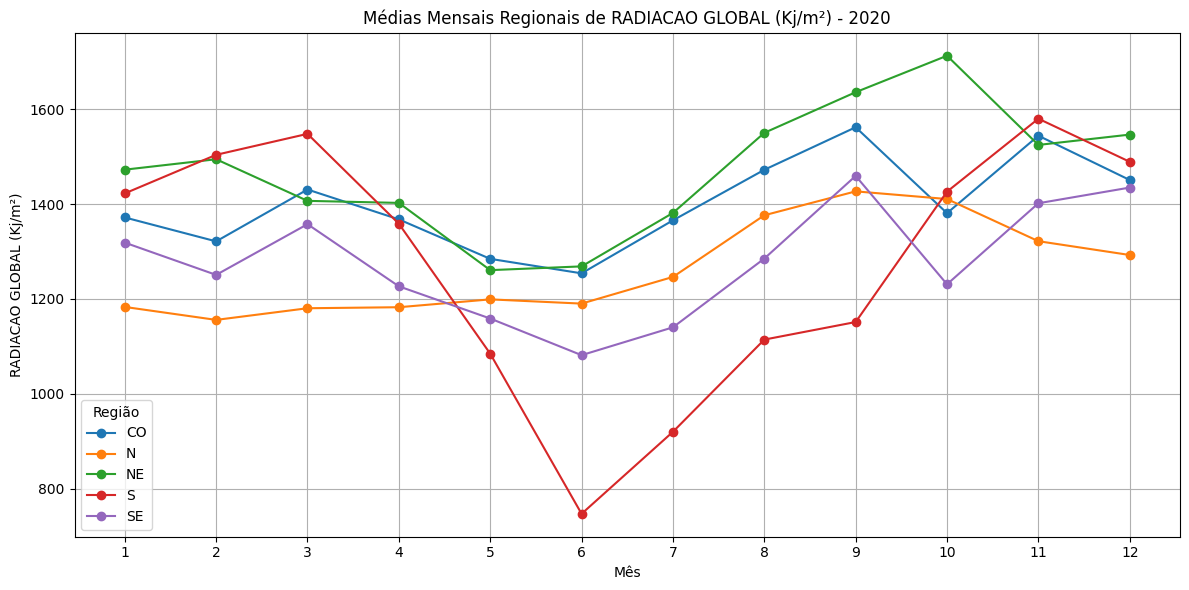

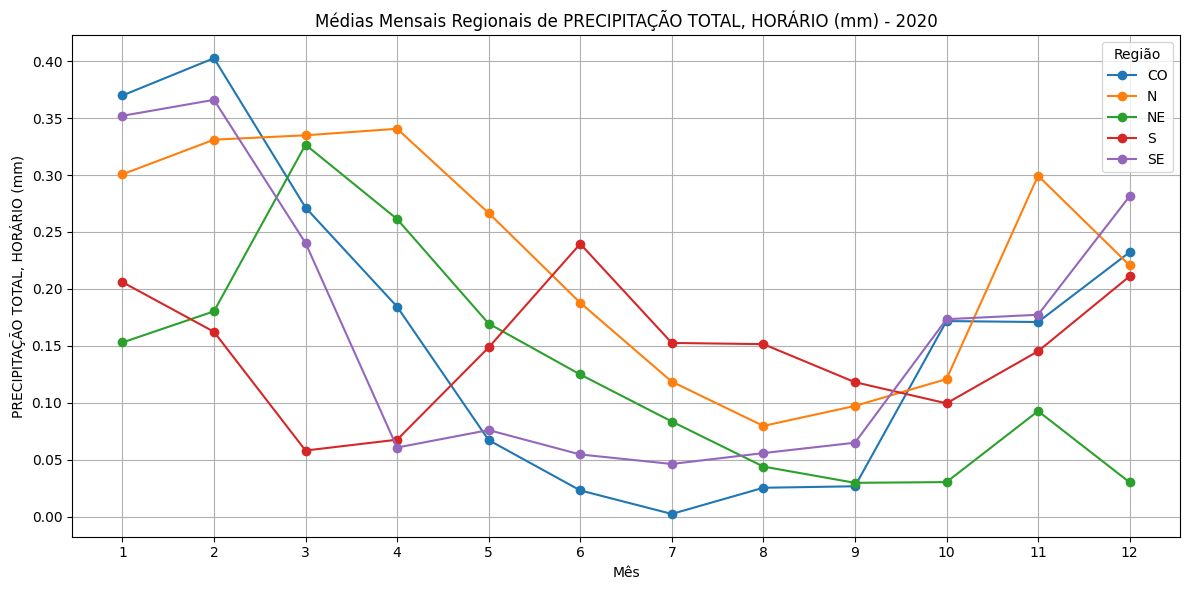

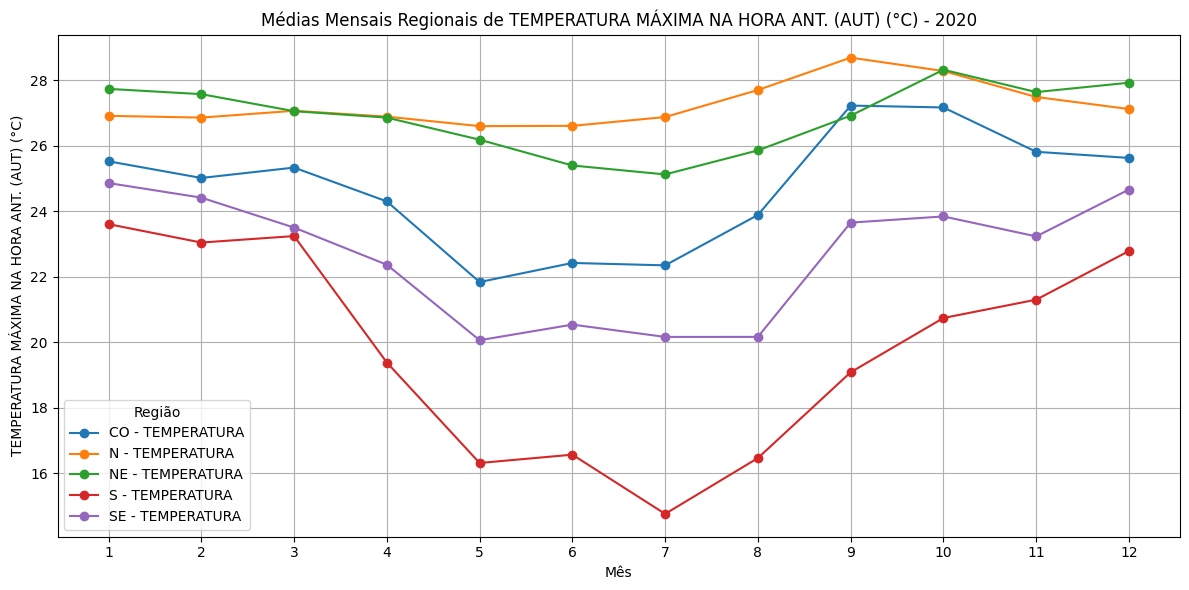

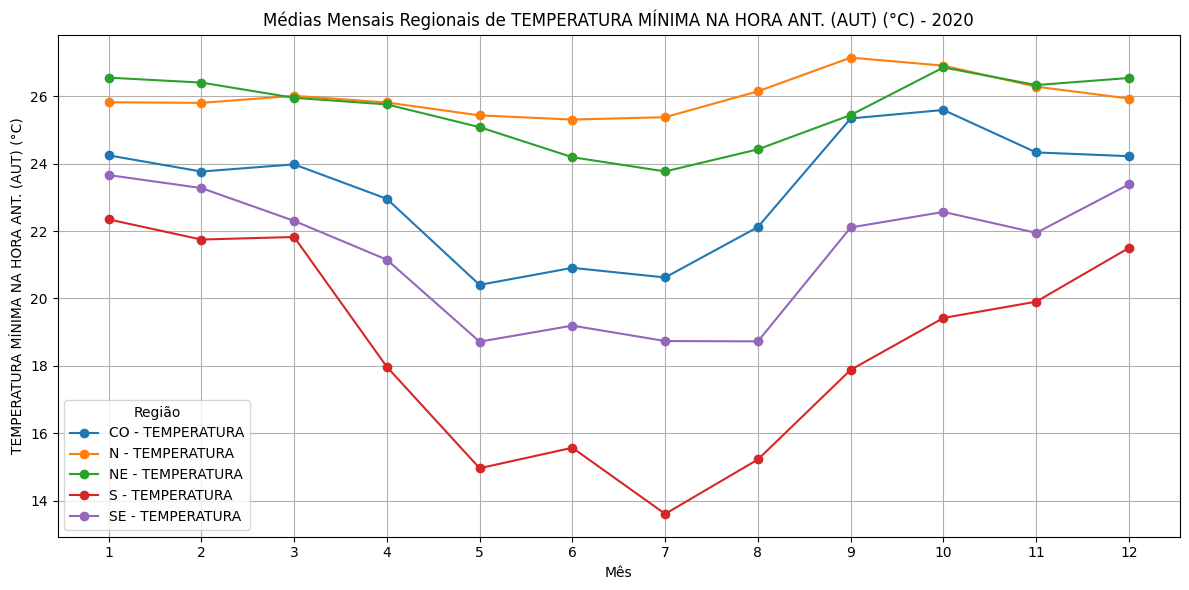

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Caminho do arquivo CSV com as médias mensais por região e estado
caminho_arquivo = '/content/drive/MyDrive/medias_mensais_geo_2020.csv'

try:
    # Ler o arquivo CSV
    df_medias_geo = pd.read_csv(caminho_arquivo)

    # Lista de regiões únicas
    regioes = df_medias_geo['Regiao'].unique()
    meses = df_medias_geo['Mês'].unique()
    meses.sort() # Ordenar os meses para o eixo x

    # --- Gráficos por Região (Média Regional) ---
    for item in ['RADIACAO GLOBAL (Kj/m²)', 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)', 'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)', 'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)']:
        plt.figure(figsize=(12, 6))
        for regiao in regioes:
            # Filtra o DataFrame para a região atual
            df_regiao = df_medias_geo[df_medias_geo['Regiao'] == regiao]
            # Calcula a média da variável para cada mês dentro da região
            media_regional = df_regiao.groupby('Mês')[item].mean()
            if item.startswith('TEMPERATURA'):
                plt.plot(media_regional.index, media_regional.values, marker='o', label=f'{regiao} - {item.split(" ")[0]}')
            else:
                plt.plot(media_regional.index, media_regional.values, marker='o', label=regiao)

        plt.title(f'Médias Mensais Regionais de {item} - 2020')
        plt.xlabel('Mês')
        plt.ylabel(item)
        plt.xticks(meses)
        plt.grid(True)
        plt.legend(title='Região')
        plt.tight_layout()
        plt.show()

except FileNotFoundError:
    print(f"Erro: O arquivo '{caminho_arquivo}' não foi encontrado.")
except KeyError as e:
    print(f"Erro: A coluna '{e}' não foi encontrada no arquivo CSV.")
except Exception as e:
    print(f"Ocorreu um erro ao gerar os gráficos: {e}")

In [11]:

import glob
import os
import csv

def gerar_medias_mensais_geo(pasta_ano):
    """
    Gera o arquivo de médias mensais por região e estado para um determinado ano.

    Args:
        pasta_ano (str): O caminho da pasta contendo os arquivos CSV do ano.
    """
    file_pattern = os.path.join(pasta_ano, '*.CSV')
    all_files = glob.glob(file_pattern)
    lista_dfs = []
    erros_leitura = {}
    colunas_nao_encontradas = {}

    coluna_radiacao = 'RADIACAO GLOBAL (Kj/m²)'
    coluna_precipitacao = 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'
    coluna_temp_max = 'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'
    coluna_temp_min = 'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)'

    for filename in all_files:
        estado = 'Desconhecido'
        regiao = 'Desconhecido'
        try:
            with open(filename, 'r', encoding='latin1') as arquivo:
                leitor = csv.reader(arquivo, delimiter=';')
                for i, linha in enumerate(leitor):
                    if len(linha) == 2:
                        if linha[0] == 'REGIAO:':
                            regiao = linha[1]
                        elif linha[0] == 'UF:':
                            estado = linha[1]
                    if i >= 7:
                        break

            df = pd.read_csv(filename, encoding='latin1', sep=';', skiprows=8, decimal=',')
            if df.empty:
                df = pd.read_csv(filename, encoding='utf-8', sep=';', skiprows=8, decimal=',')

            colunas_presentes = df.columns.tolist()

            if not df.empty and coluna_radiacao in colunas_presentes and coluna_precipitacao in colunas_presentes and coluna_temp_max in colunas_presentes and coluna_temp_min in colunas_presentes and 'Data' in colunas_presentes:
                df_temp = df[['Data', coluna_radiacao, coluna_precipitacao, coluna_temp_max, coluna_temp_min]].copy()
                df_temp['Estado'] = estado
                df_temp['Regiao'] = regiao
                df_temp[[coluna_radiacao, coluna_precipitacao, coluna_temp_max, coluna_temp_min]] = df_temp[[coluna_radiacao, coluna_precipitacao, coluna_temp_max, coluna_temp_min]].apply(pd.to_numeric, errors='coerce')
                lista_dfs.append(df_temp)
            elif not df.empty:
                colunas_faltantes = [col for col in [coluna_radiacao, coluna_precipitacao, coluna_temp_max, coluna_temp_min, 'Data'] if col not in colunas_presentes]
                if colunas_faltantes:
                    colunas_nao_encontradas[filename] = f"Colunas não encontradas: {', '.join(colunas_faltantes)}"
            else:
                erros_leitura[filename] = "Arquivo vazio ou leitura falhou."

        except Exception as e:
            erros_leitura[filename] = str(e)

    if lista_dfs:
        df_final = pd.concat(lista_dfs, ignore_index=True)
        df_final['Data'] = pd.to_datetime(df_final['Data'], format='%Y/%m/%d', errors='coerce')

        if 'Data' in df_final.columns:
            medias_mensais_geo = df_final.groupby(['Regiao', 'Estado', df_final['Data'].dt.month])[[coluna_radiacao, coluna_precipitacao, coluna_temp_max, coluna_temp_min]].mean().reset_index()
            medias_mensais_geo['Ano'] = pasta_ano.split('/')[-1] # Extrai o ano do nome da pasta
            medias_mensais_geo.rename(columns={'Data': 'Mês'}, inplace=True)

            nome_arquivo_saida = os.path.join('/content/drive/MyDrive', f'medias_mensais_geo_{pasta_ano.split("/")[-1]}.csv')
            medias_mensais_geo.to_csv(nome_arquivo_saida, index=False)
            print(f"\nMédias mensais por Região e Estado de {pasta_ano.split('/')[-1]} salvas com sucesso em: {nome_arquivo_saida}")
        else:
            print(f"Coluna 'Data' não encontrada para análise mensal em {pasta_ano}.")
    else:
        print(f"Nenhum arquivo CSV continha todas as colunas necessárias para análise em {pasta_ano}.")

    if erros_leitura:
        print(f"\nErros ao ler arquivos em {pasta_ano}:")
        for filename, erro in erros_leitura.items():
            print(f"- {os.path.basename(filename)}: {erro}")

    if colunas_nao_encontradas:
        print(f"\nColunas não encontradas em arquivos em {pasta_ano}:")
        for filename, motivo in colunas_nao_encontradas.items():
            print(f"- {os.path.basename(filename)}: {motivo}")

# Define as pastas dos anos
pastas_anos = [
    '/content/drive/MyDrive/dataverse_files/2021',
    '/content/drive/MyDrive/dataverse_files/2022',
    '/content/drive/MyDrive/dataverse_files/2023',
    '/content/drive/MyDrive/dataverse_files/2024',
    '/content/drive/MyDrive/dataverse_files/2025'
]

# Gera o arquivo de médias para cada pasta
for pasta in pastas_anos:
    print(f"\n--- Processando dados para a pasta: {pasta} ---")
    gerar_medias_mensais_geo(pasta)


--- Processando dados para a pasta: /content/drive/MyDrive/dataverse_files/2021 ---

Médias mensais por Região e Estado de 2021 salvas com sucesso em: /content/drive/MyDrive/medias_mensais_geo_2021.csv

--- Processando dados para a pasta: /content/drive/MyDrive/dataverse_files/2022 ---

Médias mensais por Região e Estado de 2022 salvas com sucesso em: /content/drive/MyDrive/medias_mensais_geo_2022.csv

--- Processando dados para a pasta: /content/drive/MyDrive/dataverse_files/2023 ---

Médias mensais por Região e Estado de 2023 salvas com sucesso em: /content/drive/MyDrive/medias_mensais_geo_2023.csv

--- Processando dados para a pasta: /content/drive/MyDrive/dataverse_files/2024 ---

Médias mensais por Região e Estado de 2024 salvas com sucesso em: /content/drive/MyDrive/medias_mensais_geo_2024.csv

--- Processando dados para a pasta: /content/drive/MyDrive/dataverse_files/2025 ---

Médias mensais por Região e Estado de 2025 salvas com sucesso em: /content/drive/MyDrive/medias_mensai

In [ ]:
import pandas as pd
import glob
import os
import csv

def gerar_medias_mensais_geo_com_temp_media(pasta_ano):
    """
    Gera o arquivo de médias mensais por região e estado, incluindo a média
    das temperaturas máxima e mínima, para um determinado ano.

    Args:
        pasta_ano (str): O caminho da pasta contendo os arquivos CSV do ano.
    """
    file_pattern = os.path.join(pasta_ano, '*.CSV')
    all_files = glob.glob(file_pattern)
    lista_dfs = []
    erros_leitura = {}
    colunas_nao_encontradas = {}

    coluna_radiacao = 'RADIACAO GLOBAL (Kj/m²)'
    coluna_precipitacao = 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'
    coluna_temp_max = 'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'
    coluna_temp_min = 'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)'

    for filename in all_files:
        estado = 'Desconhecido'
        regiao = 'Desconhecido'
        try:
            with open(filename, 'r', encoding='latin1') as arquivo:
                leitor = csv.reader(arquivo, delimiter=';')
                for i, linha in enumerate(leitor):
                    if len(linha) == 2:
                        if linha[0] == 'REGIAO:':
                            regiao = linha[1]
                        elif linha[0] == 'UF:':
                            estado = linha[1]
                    if i >= 7:
                        break

            df = pd.read_csv(filename, encoding='latin1', sep=';', skiprows=8, decimal=',')
            if df.empty:
                df = pd.read_csv(filename, encoding='utf-8', sep=';', skiprows=8, decimal=',')

            colunas_presentes = df.columns.tolist()

            if not df.empty and coluna_radiacao in colunas_presentes and coluna_precipitacao in colunas_presentes and coluna_temp_max in colunas_presentes and coluna_temp_min in colunas_presentes and 'Data' in colunas_presentes:
                df_temp = df[['Data', coluna_radiacao, coluna_precipitacao, coluna_temp_max, coluna_temp_min]].copy()
                df_temp['Estado'] = estado
                df_temp['Regiao'] = regiao
                df_temp[[coluna_radiacao, coluna_precipitacao, coluna_temp_max, coluna_temp_min]] = df_temp[[coluna_radiacao, coluna_precipitacao, coluna_temp_max, coluna_temp_min]].apply(pd.to_numeric, errors='coerce')
                lista_dfs.append(df_temp)
            elif not df.empty:
                colunas_faltantes = [col for col in [coluna_radiacao, coluna_precipitacao, coluna_temp_max, coluna_temp_min, 'Data'] if col not in colunas_presentes]
                if colunas_faltantes:
                    colunas_nao_encontradas[filename] = f"Colunas não encontradas: {', '.join(colunas_faltantes)}"
            else:
                erros_leitura[filename] = "Arquivo vazio ou leitura falhou."

        except Exception as e:
            erros_leitura[filename] = str(e)

    if lista_dfs:
        df_final = pd.concat(lista_dfs, ignore_index=True)
        df_final['Data'] = pd.to_datetime(df_final['Data'], format='%Y/%m/%d', errors='coerce')

        if 'Data' in df_final.columns:
            medias_mensais_geo = df_final.groupby(['Regiao', 'Estado', df_final['Data'].dt.month])[[coluna_radiacao, coluna_precipitacao, coluna_temp_max, coluna_temp_min]].mean().reset_index()
            medias_mensais_geo['Temp_Media'] = (medias_mensais_geo[coluna_temp_max] + medias_mensais_geo[coluna_temp_min]) / 2
            medias_mensais_geo['Ano'] = pasta_ano.split('/')[-1] # Extrai o ano do nome da pasta
            medias_mensais_geo.rename(columns={'Data': 'Mês'}, inplace=True)

            nome_arquivo_saida = os.path.join('/content/drive/MyDrive', f'medias_mensais_geo_temp_media_{pasta_ano.split("/")[-1]}.csv')
            medias_mensais_geo.to_csv(nome_arquivo_saida, index=False)
            print(f"\nMédias mensais por Região e Estado (com Temp. Média) de {pasta_ano.split('/')[-1]} salvas com sucesso em: {nome_arquivo_saida}")
        else:
            print(f"Coluna 'Data' não encontrada para análise mensal em {pasta_ano}.")
    else:
        print(f"Nenhum arquivo CSV continha todas as colunas necessárias para análise em {pasta_ano}.")

    if erros_leitura:
        print(f"\nErros ao ler arquivos em {pasta_ano}:")
        for filename, erro in erros_leitura.items():
            print(f"- {os.path.basename(filename)}: {erro}")

    if colunas_nao_encontradas:
        print(f"\nColunas não encontradas em arquivos em {pasta_ano}:")
        for filename, motivo in colunas_nao_encontradas.items():
            print(f"- {os.path.basename(filename)}: {motivo}")

# Define as pastas dos anos
pastas_anos = [
    '/content/drive/MyDrive/dataverse_files/2020',
    '/content/drive/MyDrive/dataverse_files/2021',
    '/content/drive/MyDrive/dataverse_files/2022',
    '/content/drive/MyDrive/dataverse_files/2023',
    '/content/drive/MyDrive/dataverse_files/2024',
    '/content/drive/MyDrive/dataverse_files/2025'
]

# Gera o arquivo de médias para cada pasta
for pasta in pastas_anos:
    print(f"\n--- Processando dados para a pasta: {pasta} ---")
    gerar_medias_mensais_geo_com_temp_media(pasta)



--- Processando dados para a pasta: /content/drive/MyDrive/dataverse_files/2020 ---

Médias mensais por Região e Estado (com Temp. Média) de 2020 salvas com sucesso em: /content/drive/MyDrive/medias_mensais_geo_temp_media_2020.csv

--- Processando dados para a pasta: /content/drive/MyDrive/dataverse_files/2021 ---

Médias mensais por Região e Estado (com Temp. Média) de 2021 salvas com sucesso em: /content/drive/MyDrive/medias_mensais_geo_temp_media_2021.csv

--- Processando dados para a pasta: /content/drive/MyDrive/dataverse_files/2022 ---

Médias mensais por Região e Estado (com Temp. Média) de 2022 salvas com sucesso em: /content/drive/MyDrive/medias_mensais_geo_temp_media_2022.csv

--- Processando dados para a pasta: /content/drive/MyDrive/dataverse_files/2023 ---
Nenhum arquivo CSV continha todas as colunas necessárias para análise em /content/drive/MyDrive/dataverse_files/2023.

--- Processando dados para a pasta: /content/drive/MyDrive/dataverse_files/2024 ---
Nenhum arquivo C

In [12]:
import pandas as pd
import os

# Caminho base para os arquivos de médias mensais
caminho_base = '/content/drive/MyDrive/'
anos = range(2020, 2026)
all_dfs = []

for ano in anos:
    nome_arquivo = f'medias_mensais_geo_{ano}.csv' # Ou 'medias_mensais_geo_temp_media_{ano}.csv' se preferir
    caminho_arquivo = os.path.join(caminho_base, nome_arquivo)
    try:
        df_ano = pd.read_csv(caminho_arquivo)
        df_ano['Ano'] = ano
        all_dfs.append(df_ano)
        print(f"Arquivo {nome_arquivo} lido com sucesso.")
    except FileNotFoundError:
        print(f"Arquivo {nome_arquivo} não encontrado.")
    except Exception as e:
        print(f"Erro ao ler {nome_arquivo}: {e}")

if all_dfs:
    df_unificado = pd.concat(all_dfs, ignore_index=True)
    nome_arquivo_unificado = os.path.join(caminho_base, 'medias_mensais_geo_2020_2025.csv') # Ou outro nome
    df_unificado.to_csv(nome_arquivo_unificado, index=False)
    print(f"\nDados unificados de 2020 a 2025 salvos em: {nome_arquivo_unificado}")
else:
    print("\nNenhum arquivo de dados encontrado para unificar.")

Arquivo medias_mensais_geo_2020.csv lido com sucesso.
Arquivo medias_mensais_geo_2021.csv lido com sucesso.
Arquivo medias_mensais_geo_2022.csv lido com sucesso.
Arquivo medias_mensais_geo_2023.csv lido com sucesso.
Arquivo medias_mensais_geo_2024.csv lido com sucesso.
Arquivo medias_mensais_geo_2025.csv lido com sucesso.

Dados unificados de 2020 a 2025 salvos em: /content/drive/MyDrive/medias_mensais_geo_2020_2025.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Caminho para o arquivo unificado
caminho_arquivo_unificado = '/content/drive/MyDrive/medias_mensais_geo_2020_2025.csv'

try:
    # Ler o arquivo unificado
    df_unificado = pd.read_csv(caminho_arquivo_unificado)

    # Lista de regiões únicas
    regioes = df_unificado['Regiao'].unique()
    regioes.sort()

    # Lista de anos únicos
    anos = df_unificado['Ano'].unique()
    anos.sort()

    # Variáveis a serem plotadas
    variaveis = {
        'Temperatura Média (°C)': 'Temp_Media',
        'Precipitação Total (mm)': 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
        'Radiação Global (Kj/m²)': 'RADIACAO GLOBAL (Kj/m²)'
    }

    # Cores para os anos
    cores_anos = {2020: 'blue', 2021: 'green', 2022: 'red', 2023: 'purple', 2024: 'orange', 2025: 'brown'}

    # --- Gerar um gráfico para cada variável ---
    for nome_var, coluna_var in variaveis.items():
        plt.figure(figsize=(12, 7))
        for regiao in regioes:
            df_regiao = df_unificado[df_unificado['Regiao'] == regiao]
            for ano in anos:
                df_ano_regiao = df_regiao[df_regiao['Ano'] == ano].groupby('Mês')[coluna_var].mean()
                if not df_ano_regiao.empty:
                    plt.plot(df_ano_regiao.index, df_ano_regiao.values, marker='o', linestyle='-', color=cores_anos.get(ano, 'gray'), label=f'{regiao} ({ano})')

        plt.title(f'Média Mensal de {nome_var} por Região (2020-2025)')
        plt.xlabel('Mês')
        plt.ylabel(nome_var)
        plt.xticks(range(1, 13))
        plt.grid(True)
        plt.legend(title='Região (Ano)', fontsize='small')
        plt.tight_layout()
        plt.show()

except FileNotFoundError:
    print(f"Erro: O arquivo '{caminho_arquivo_unificado}' não foi encontrado.")
except KeyError as e:
    print(f"Erro: A coluna '{e}' não foi encontrada no arquivo CSV.")
except Exception as e:
    print(f"Ocorreu um erro ao gerar os gráficos: {e}")

Erro: A coluna ''Column not found: Temp_Media'' não foi encontrada no arquivo CSV.


<Figure size 1200x700 with 0 Axes>

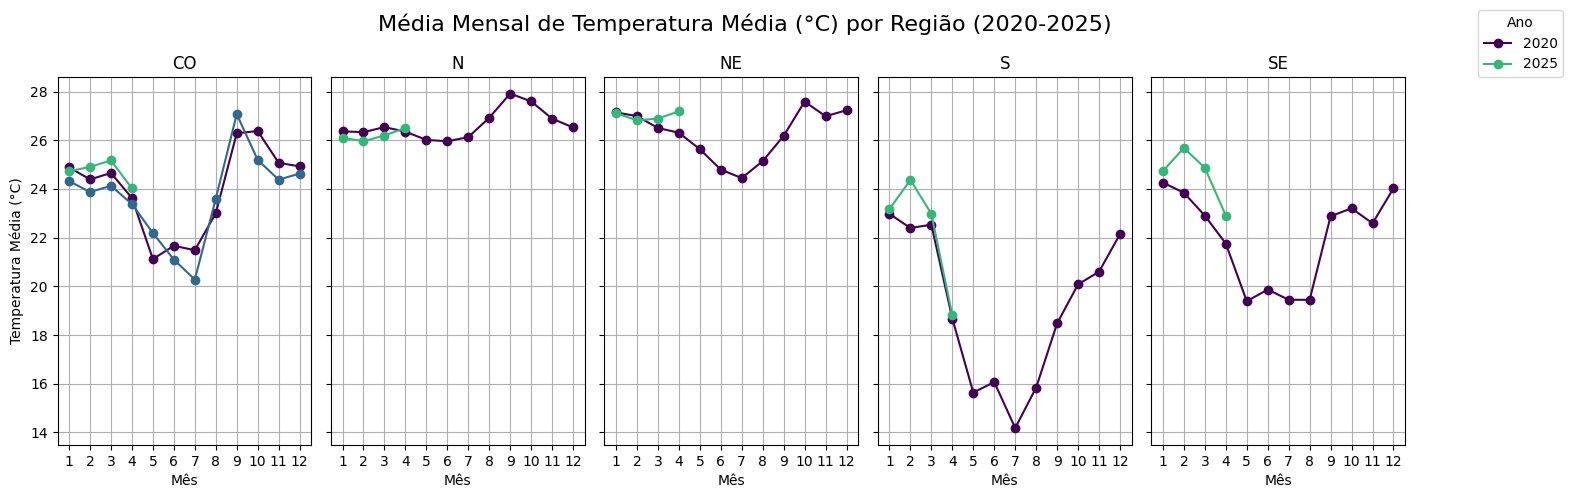

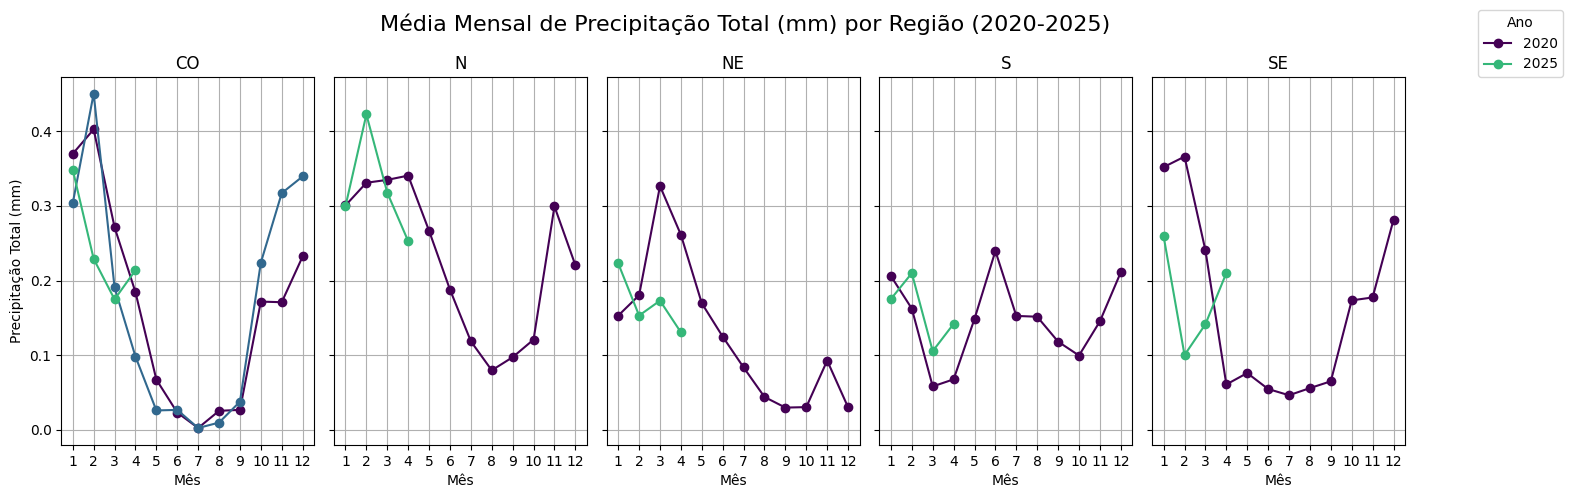

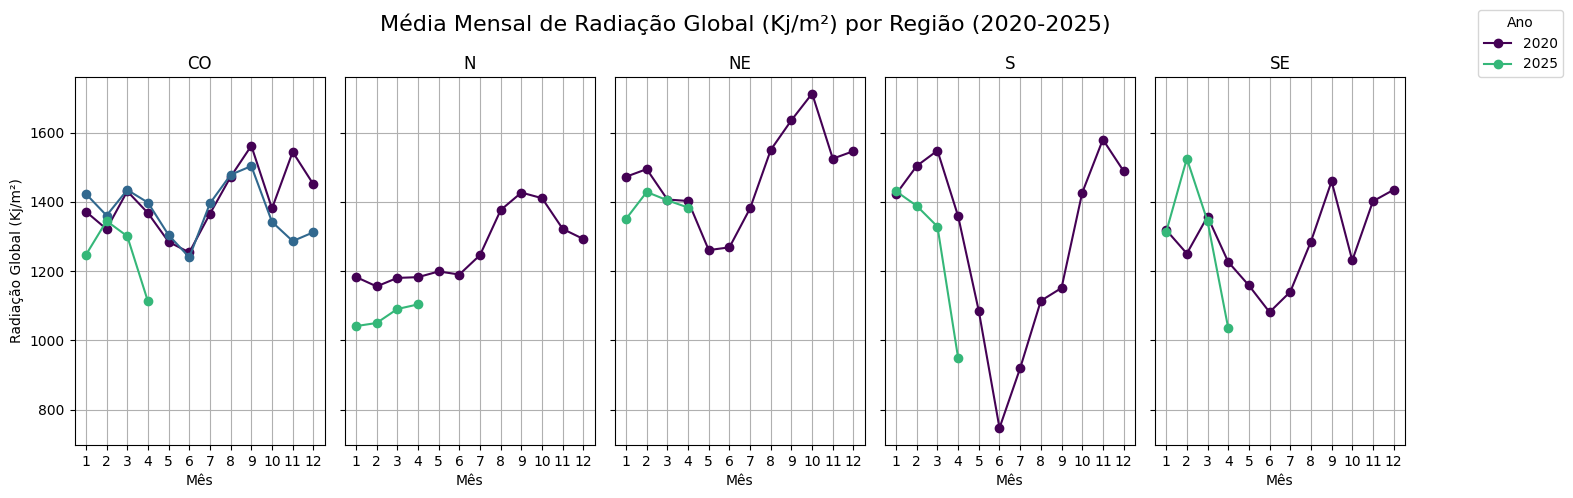

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Caminho para o arquivo unificado
caminho_arquivo_unificado = '/content/drive/MyDrive/medias_mensais_geo_2020_2025.csv'

try:
    # Ler o arquivo unificado
    df_unificado = pd.read_csv(caminho_arquivo_unificado)

    # Calcular a média da temperatura
    df_unificado['Temperatura Média (°C)'] = (df_unificado['TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'] + df_unificado['TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)']) / 2

    # Lista de regiões únicas
    regioes = sorted(df_unificado['Regiao'].unique())

    # Lista de anos únicos
    anos = sorted(df_unificado['Ano'].unique())

    # Variáveis a serem plotadas
    variaveis = {
        'Temperatura Média (°C)': 'Temperatura Média (°C)',
        'Precipitação Total (mm)': 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
        'Radiação Global (Kj/m²)': 'RADIACAO GLOBAL (Kj/m²)'
    }

    # Cores para os anos
    cores_anos = {ano: plt.cm.viridis(i/len(anos)) for i, ano in enumerate(anos)}

    # --- Gerar gráficos facetados por variável ---
    for nome_var, coluna_var in variaveis.items():
        fig, axes = plt.subplots(nrows=1, ncols=len(regioes), figsize=(15, 5), sharey=True)
        fig.suptitle(f'Média Mensal de {nome_var} por Região (2020-2025)', fontsize=16)

        for i, regiao in enumerate(regioes):
            ax = axes[i]
            df_regiao = df_unificado[df_unificado['Regiao'] == regiao]
            for ano in anos:
                df_ano_regiao = df_regiao[df_regiao['Ano'] == ano].groupby('Mês')[coluna_var].mean()
                if not df_ano_regiao.empty:
                    ax.plot(df_ano_regiao.index, df_ano_regiao.values, marker='o', linestyle='-', color=cores_anos[ano], label=str(ano))
            ax.set_title(regiao)
            ax.set_xlabel('Mês')
            if i == 0:
                ax.set_ylabel(nome_var)
            ax.set_xticks(range(1, 13))
            ax.grid(True)

        # Adicionar legenda fora dos subplots
        handles, labels = axes[-1].get_legend_handles_labels()
        fig.legend(handles, labels, title='Ano', loc='upper right', bbox_to_anchor=(1.05, 1))

        plt.tight_layout(rect=[0, 0, 0.95, 1]) # Ajustar layout para a legenda
        plt.show()

except FileNotFoundError:
    print(f"Erro: O arquivo '{caminho_arquivo_unificado}' não foi encontrado.")
except KeyError as e:
    print(f"Erro: A coluna '{e}' não foi encontrada no arquivo CSV.")
except Exception as e:
    print(f"Ocorreu um erro ao gerar os gráficos: {e}")

In [ ]:
import pandas as pd
import glob
import os
import csv

def gerar_medias_mensais_geo_com_temp_media(pasta_ano):
    """
    Gera o arquivo de médias mensais por região e estado, incluindo a média
    das temperaturas máxima e mínima, para um determinado ano.

    Args:
        pasta_ano (str): O caminho da pasta contendo os arquivos CSV do ano.
    """
    file_pattern = os.path.join(pasta_ano, '*.CSV')
    all_files = glob.glob(file_pattern)
    lista_dfs = []
    erros_leitura = {}
    colunas_nao_encontradas = {}

    coluna_radiacao = 'RADIACAO GLOBAL (Kj/m²)'
    coluna_precipitacao = 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'
    coluna_temp_max = 'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'
    coluna_temp_min = 'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)'

    for filename in all_files:
        estado = 'Desconhecido'
        regiao = 'Desconhecido'
        try:
            with open(filename, 'r', encoding='latin1') as arquivo:
                leitor = csv.reader(arquivo, delimiter=';')
                for i, linha in enumerate(leitor):
                    if len(linha) == 2:
                        if linha[0] == 'REGIAO:':
                            regiao = linha[1]
                        elif linha[0] == 'UF:':
                            estado = linha[1]
                    if i >= 7:
                        break

            df = pd.read_csv(filename, encoding='latin1', sep=';', skiprows=8, decimal=',')
            if df.empty:
                df = pd.read_csv(filename, encoding='utf-8', sep=';', skiprows=8, decimal=',')

            colunas_presentes = df.columns.tolist()

            if not df.empty and coluna_radiacao in colunas_presentes and coluna_precipitacao in colunas_presentes and coluna_temp_max in colunas_presentes and coluna_temp_min in colunas_presentes and 'Data' in colunas_presentes:
                df_temp = df[['Data', coluna_radiacao, coluna_precipitacao, coluna_temp_max, coluna_temp_min]].copy()
                df_temp['Estado'] = estado
                df_temp['Regiao'] = regiao
                df_temp[[coluna_radiacao, coluna_precipitacao, coluna_temp_max, coluna_temp_min]] = df_temp[[coluna_radiacao, coluna_precipitacao, coluna_temp_max, coluna_temp_min]].apply(pd.to_numeric, errors='coerce')
                lista_dfs.append(df_temp)
            elif not df.empty:
                colunas_faltantes = [col for col in [coluna_radiacao, coluna_precipitacao, coluna_temp_max, coluna_temp_min, 'Data'] if col not in colunas_presentes]
                if colunas_faltantes:
                    colunas_nao_encontradas[filename] = f"Colunas não encontradas: {', '.join(colunas_faltantes)}"
            else:
                erros_leitura[filename] = "Arquivo vazio ou leitura falhou."

        except Exception as e:
            erros_leitura[filename] = str(e)

    if lista_dfs:
        df_final = pd.concat(lista_dfs, ignore_index=True)
        df_final['Data'] = pd.to_datetime(df_final['Data'], format='%Y/%m/%d', errors='coerce')

        if 'Data' in df_final.columns:
            medias_mensais_geo = df_final.groupby(['Regiao', 'Estado', df_final['Data'].dt.month])[[coluna_radiacao, coluna_precipitacao, coluna_temp_max, coluna_temp_min]].mean().reset_index()
            medias_mensais_geo['Temp_Media'] = (medias_mensais_geo[coluna_temp_max] + medias_mensais_geo[coluna_temp_min]) / 2
            medias_mensais_geo['Ano'] = pasta_ano.split('/')[-1] # Extrai o ano do nome da pasta
            medias_mensais_geo.rename(columns={'Data': 'Mês'}, inplace=True)

            nome_arquivo_saida = os.path.join('/content/drive/MyDrive', f'medias_mensais_geo_temp_media_{pasta_ano.split("/")[-1]}.csv')
            medias_mensais_geo.to_csv(nome_arquivo_saida, index=False)
            print(f"\nMédias mensais por Região e Estado (com Temp. Média) de {pasta_ano.split('/')[-1]} salvas com sucesso em: {nome_arquivo_saida}")
        else:
            print(f"Coluna 'Data' não encontrada para análise mensal em {pasta_ano}.")
    else:
        print(f"Nenhum arquivo CSV continha todas as colunas necessárias para análise em {pasta_ano}.")

    if erros_leitura:
        print(f"\nErros ao ler arquivos em {pasta_ano}:")
        for filename, erro in erros_leitura.items():
            print(f"- {os.path.basename(filename)}: {erro}")

    if colunas_nao_encontradas:
        print(f"\nColunas não encontradas em arquivos em {pasta_ano}:")
        for filename, motivo in colunas_nao_encontradas.items():
            print(f"- {os.path.basename(filename)}: {motivo}")

# Define as pastas dos anos
pastas_anos = [
    '/content/drive/MyDrive/dataverse_files/2020',
    '/content/drive/MyDrive/dataverse_files/2021',
    '/content/drive/MyDrive/dataverse_files/2022',
    '/content/drive/MyDrive/dataverse_files/2023',
    '/content/drive/MyDrive/dataverse_files/2024',
    '/content/drive/MyDrive/dataverse_files/2025'
]

# Gera o arquivo de médias para cada pasta
for pasta in pastas_anos:
    print(f"\n--- Processando dados para a pasta: {pasta} ---")
    gerar_medias_mensais_geo_com_temp_media(pasta)


--- Processando dados para a pasta: /content/drive/MyDrive/dataverse_files/2020 ---

Médias mensais por Região e Estado (com Temp. Média) de 2020 salvas com sucesso em: /content/drive/MyDrive/medias_mensais_geo_temp_media_2020.csv

--- Processando dados para a pasta: /content/drive/MyDrive/dataverse_files/2021 ---

Médias mensais por Região e Estado (com Temp. Média) de 2021 salvas com sucesso em: /content/drive/MyDrive/medias_mensais_geo_temp_media_2021.csv

--- Processando dados para a pasta: /content/drive/MyDrive/dataverse_files/2022 ---

Médias mensais por Região e Estado (com Temp. Média) de 2022 salvas com sucesso em: /content/drive/MyDrive/medias_mensais_geo_temp_media_2022.csv

--- Processando dados para a pasta: /content/drive/MyDrive/dataverse_files/2023 ---

Médias mensais por Região e Estado (com Temp. Média) de 2023 salvas com sucesso em: /content/drive/MyDrive/medias_mensais_geo_temp_media_2023.csv

--- Processando dados para a pasta: /content/drive/MyDrive/dataverse_fi

In [ ]:
import pandas as pd
import os

# Caminho base para os arquivos de médias mensais
caminho_base = '/content/drive/MyDrive/'
anos = range(2020, 2026)
all_dfs = []

for ano in anos:
    nome_arquivo = f'medias_mensais_geo_temp_media_{ano}.csv'
    caminho_arquivo = os.path.join(caminho_base, nome_arquivo)
    try:
        df_ano = pd.read_csv(caminho_arquivo)
        df_ano['Ano'] = ano
        all_dfs.append(df_ano)
        print(f"Arquivo {nome_arquivo} lido com sucesso.")
    except FileNotFoundError:
        print(f"Arquivo {nome_arquivo} não encontrado.")
    except Exception as e:
        print(f"Erro ao ler {nome_arquivo}: {e}")

if all_dfs:
    df_unificado = pd.concat(all_dfs, ignore_index=True)
    nome_arquivo_unificado = os.path.join(caminho_base, 'medias_mensais_geo_temp_media_completo.csv')
    df_unificado.to_csv(nome_arquivo_unificado, index=False)
    print(f"\nDados unificados de 2020 a 2025 (com Temp. Média) salvos em: {nome_arquivo_unificado}")
else:
    print("\nNenhum arquivo de dados encontrado para unificar.")

Arquivo medias_mensais_geo_temp_media_2020.csv lido com sucesso.
Arquivo medias_mensais_geo_temp_media_2021.csv lido com sucesso.
Arquivo medias_mensais_geo_temp_media_2022.csv lido com sucesso.
Arquivo medias_mensais_geo_temp_media_2023.csv lido com sucesso.
Arquivo medias_mensais_geo_temp_media_2024.csv lido com sucesso.
Arquivo medias_mensais_geo_temp_media_2025.csv lido com sucesso.

Dados unificados de 2020 a 2025 (com Temp. Média) salvos em: /content/drive/MyDrive/medias_mensais_geo_temp_media_completo.csv


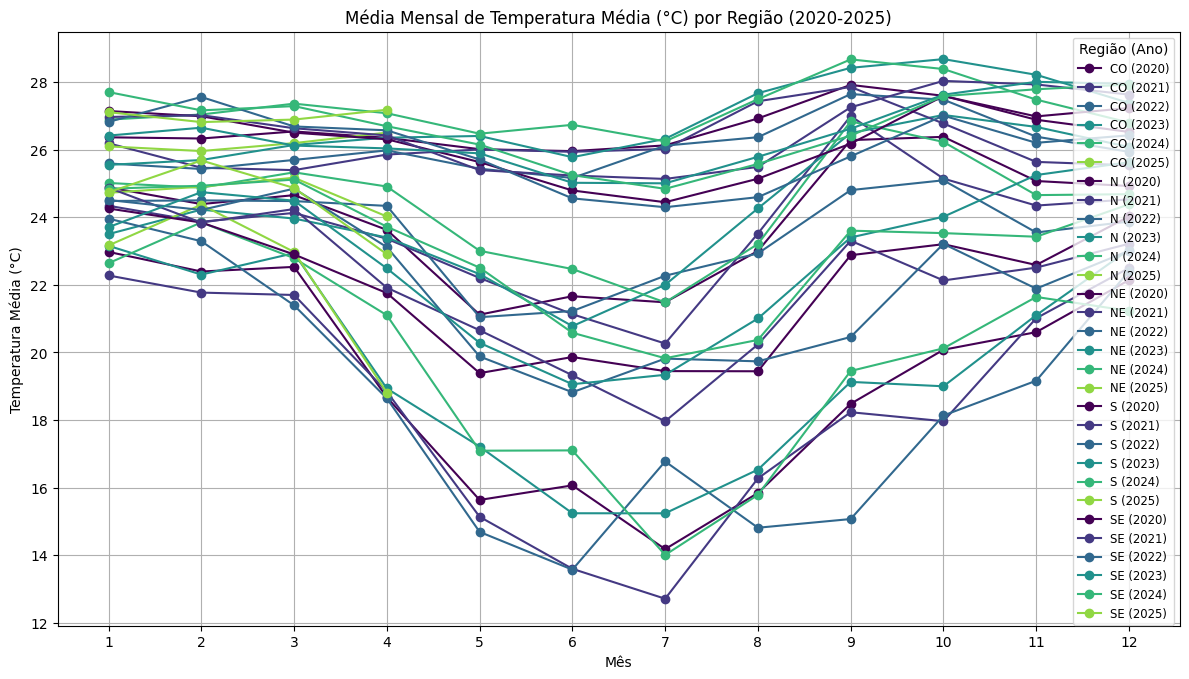

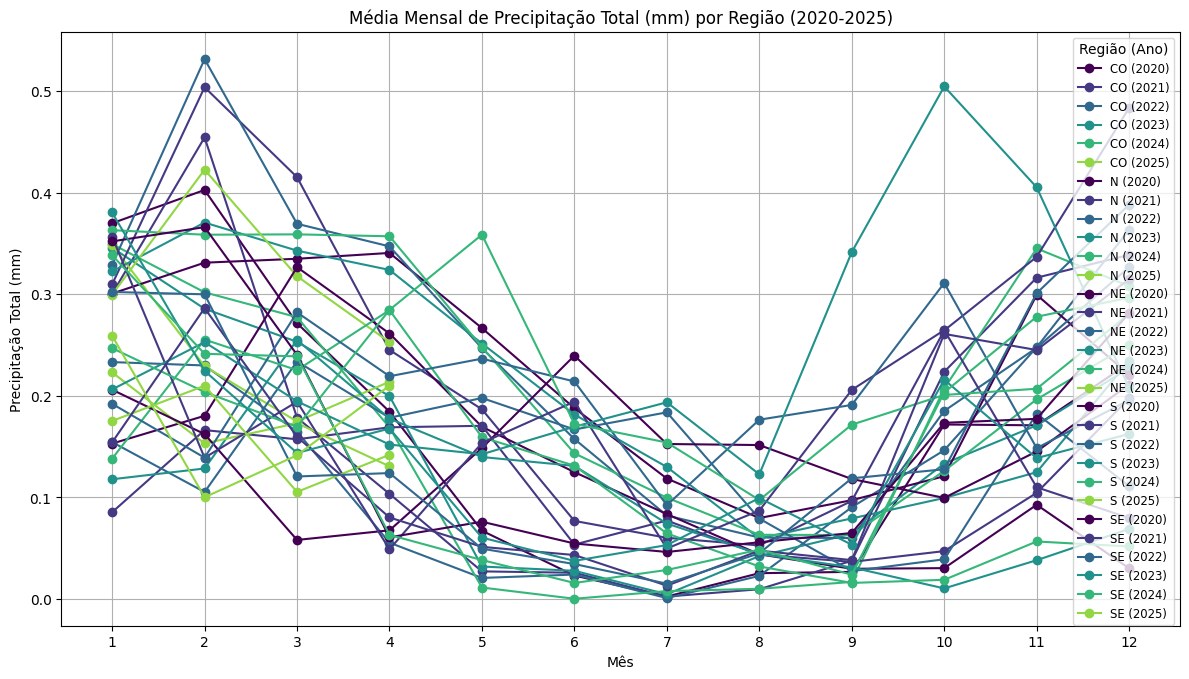

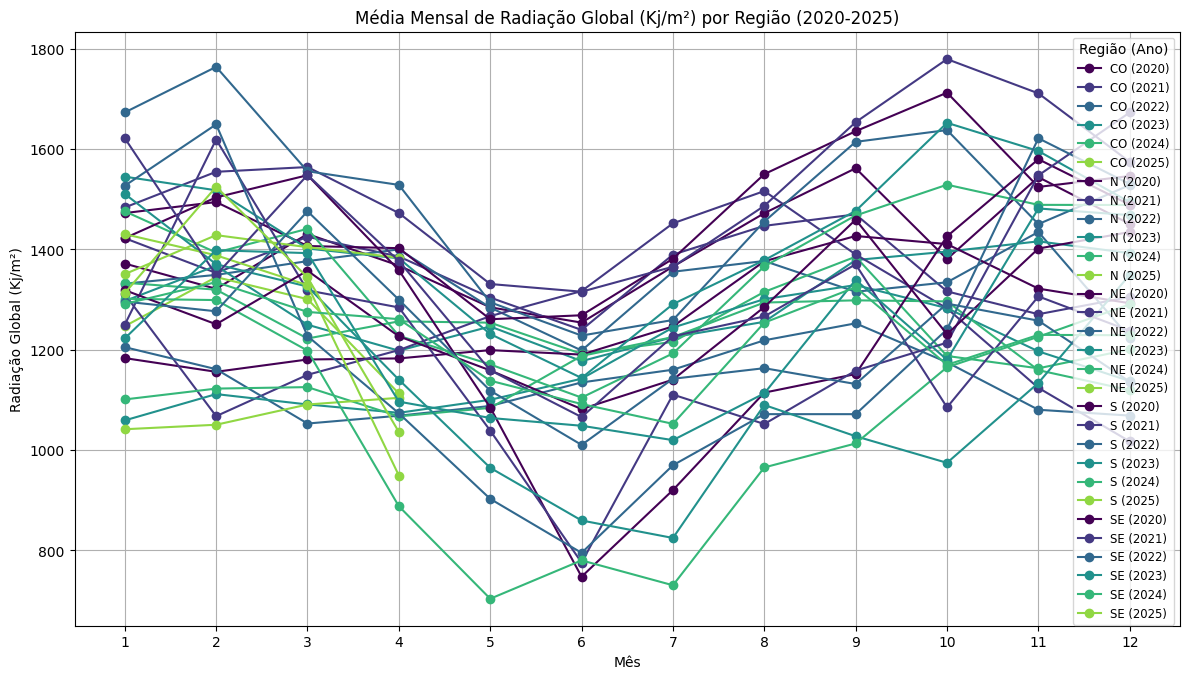

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Caminho para o arquivo unificado
caminho_arquivo_unificado = '/content/drive/MyDrive/medias_mensais_geo_temp_media_completo.csv'

try:
    # Ler o arquivo unificado
    df_unificado = pd.read_csv(caminho_arquivo_unificado)

    # Lista de regiões únicas
    regioes = sorted(df_unificado['Regiao'].unique())

    # Lista de anos únicas
    anos = sorted(df_unificado['Ano'].unique())

    # Variáveis a serem plotadas
    variaveis = {
        'Temperatura Média (°C)': 'Temp_Media',
        'Precipitação Total (mm)': 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
        'Radiação Global (Kj/m²)': 'RADIACAO GLOBAL (Kj/m²)'
    }

    # Cores para os anos
    cores_anos = {ano: plt.cm.viridis(i / len(anos)) for i, ano in enumerate(anos)}

    # --- Gerar um gráfico para cada variável ---
    for nome_var, coluna_var in variaveis.items():
        plt.figure(figsize=(12, 7))
        for regiao in regioes:
            df_regiao = df_unificado[df_unificado['Regiao'] == regiao]
            for ano in anos:
                df_ano_regiao = df_regiao[df_regiao['Ano'] == ano].groupby('Mês')[coluna_var].mean()
                if not df_ano_regiao.empty:
                    plt.plot(df_ano_regiao.index, df_ano_regiao.values, marker='o', linestyle='-', color=cores_anos[ano], label=f'{regiao} ({ano})')

        plt.title(f'Média Mensal de {nome_var} por Região (2020-2025)')
        plt.xlabel('Mês')
        plt.ylabel(nome_var)
        plt.xticks(range(1, 13))
        plt.grid(True)
        plt.legend(title='Região (Ano)', fontsize='small')
        plt.tight_layout()
        plt.show()

except FileNotFoundError:
    print(f"Erro: O arquivo '{caminho_arquivo_unificado}' não foi encontrado.")
except KeyError as e:
    print(f"Erro: A coluna '{e}' não foi encontrada no arquivo CSV.")
except Exception as e:
    print(f"Ocorreu um erro ao gerar os gráficos: {e}")

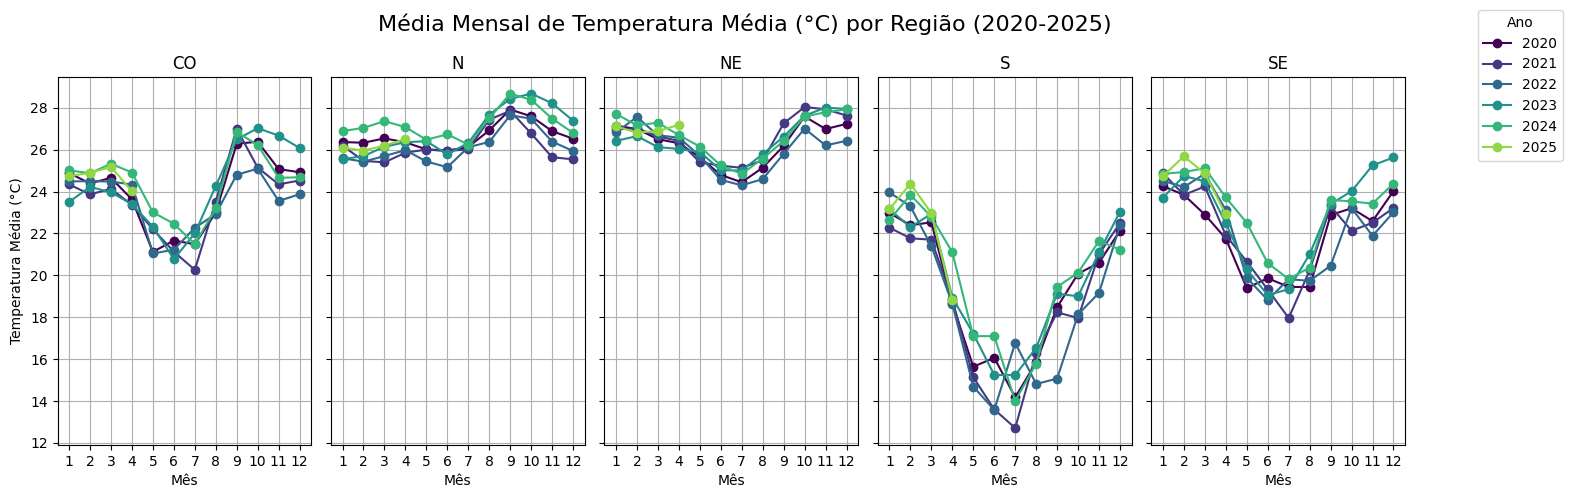

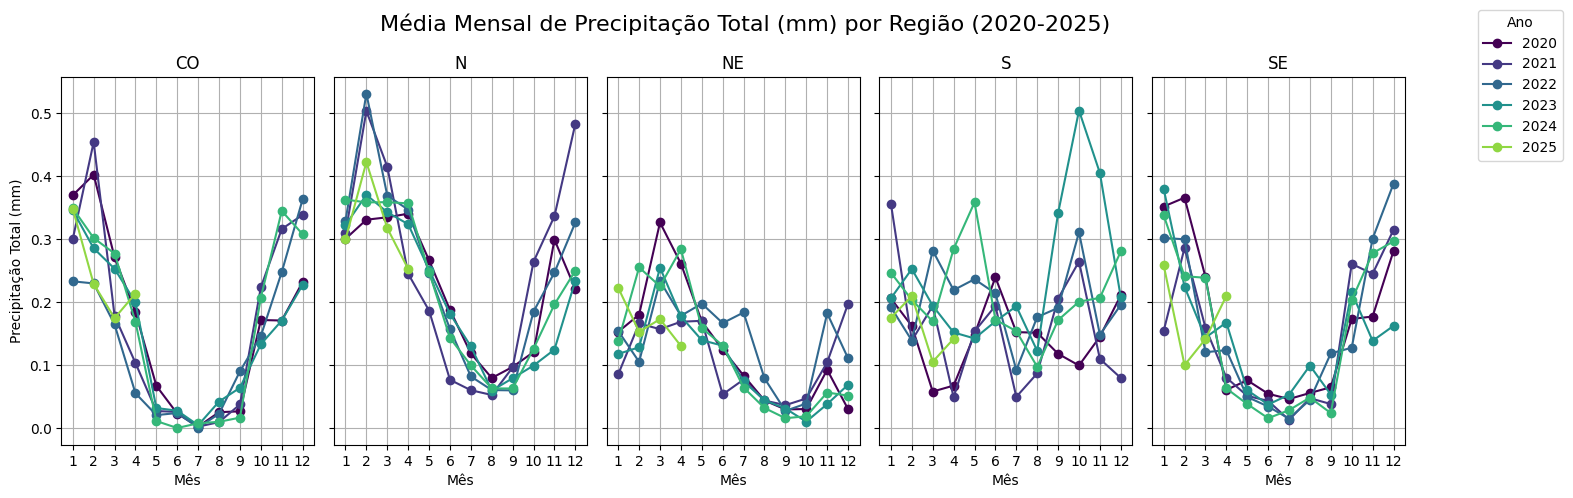

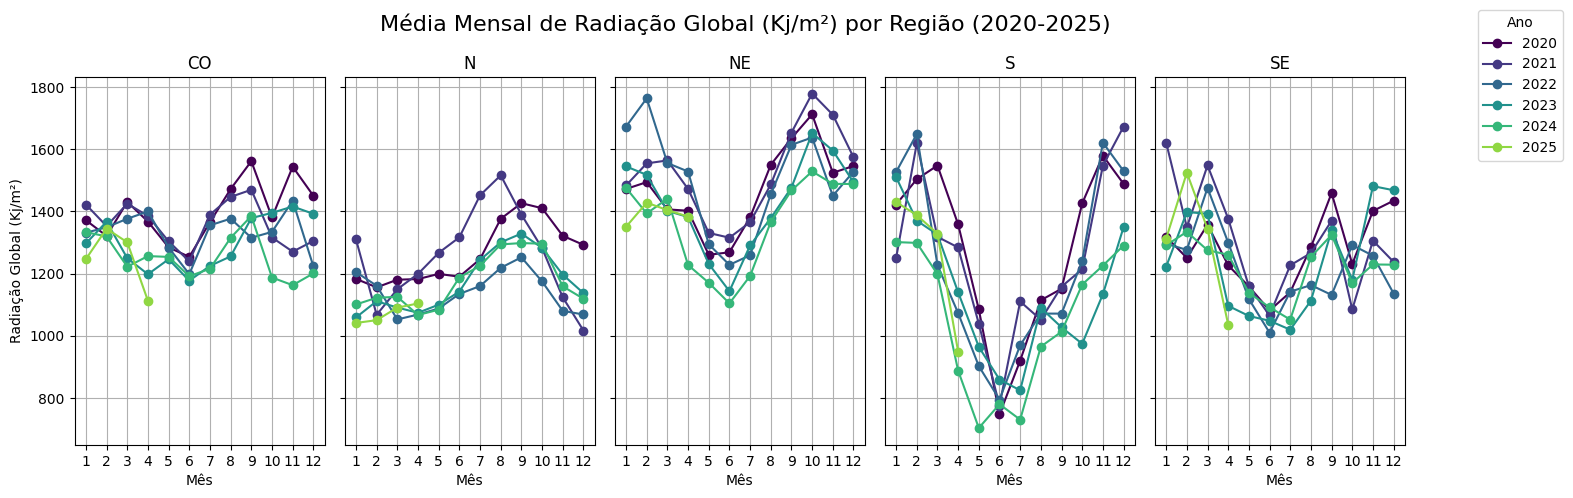

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Caminho para o arquivo unificado
caminho_arquivo_unificado = '/content/drive/MyDrive/medias_mensais_geo_temp_media_completo.csv'

try:
    # Ler o arquivo unificado
    df_unificado = pd.read_csv(caminho_arquivo_unificado)

    # Lista de regiões únicas
    regioes = sorted(df_unificado['Regiao'].unique())

    # Lista de anos únicas
    anos = sorted(df_unificado['Ano'].unique())

    # Variáveis a serem plotadas
    variaveis = {
        'Temperatura Média (°C)': 'Temp_Media',
        'Precipitação Total (mm)': 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
        'Radiação Global (Kj/m²)': 'RADIACAO GLOBAL (Kj/m²)'
    }

    # Cores para os anos
    cores_anos = {ano: plt.cm.viridis(i / len(anos)) for i, ano in enumerate(anos)}

    # --- Gerar gráficos facetados por região ---
    for nome_var, coluna_var in variaveis.items():
        fig, axes = plt.subplots(nrows=1, ncols=len(regioes), figsize=(15, 5), sharey=True)
        fig.suptitle(f'Média Mensal de {nome_var} por Região (2020-2025)', fontsize=16)

        for i, regiao in enumerate(regioes):
            ax = axes[i]
            df_regiao = df_unificado[df_unificado['Regiao'] == regiao]
            for ano in anos:
                df_ano_regiao = df_regiao[df_regiao['Ano'] == ano].groupby('Mês')[coluna_var].mean()
                if not df_ano_regiao.empty:
                    ax.plot(df_ano_regiao.index, df_ano_regiao.values, marker='o', linestyle='-', color=cores_anos[ano], label=str(ano))
            ax.set_title(regiao)
            ax.set_xlabel('Mês')
            if i == 0:
                ax.set_ylabel(nome_var)
            ax.set_xticks(range(1, 13))
            ax.grid(True)

        # Adicionar legenda fora dos subplots
        handles, labels = axes[-1].get_legend_handles_labels()
        fig.legend(handles, labels, title='Ano', loc='upper right', bbox_to_anchor=(1.05, 1))

        plt.tight_layout(rect=[0, 0, 0.95, 1]) # Ajustar layout para a legenda
        plt.show()

except FileNotFoundError:
    print(f"Erro: O arquivo '{caminho_arquivo_unificado}' não foi encontrado.")
except KeyError as e:
    print(f"Erro: A coluna '{e}' não foi encontrada no arquivo CSV.")
except Exception as e:
    print(f"Ocorreu um erro ao gerar os gráficos: {e}")


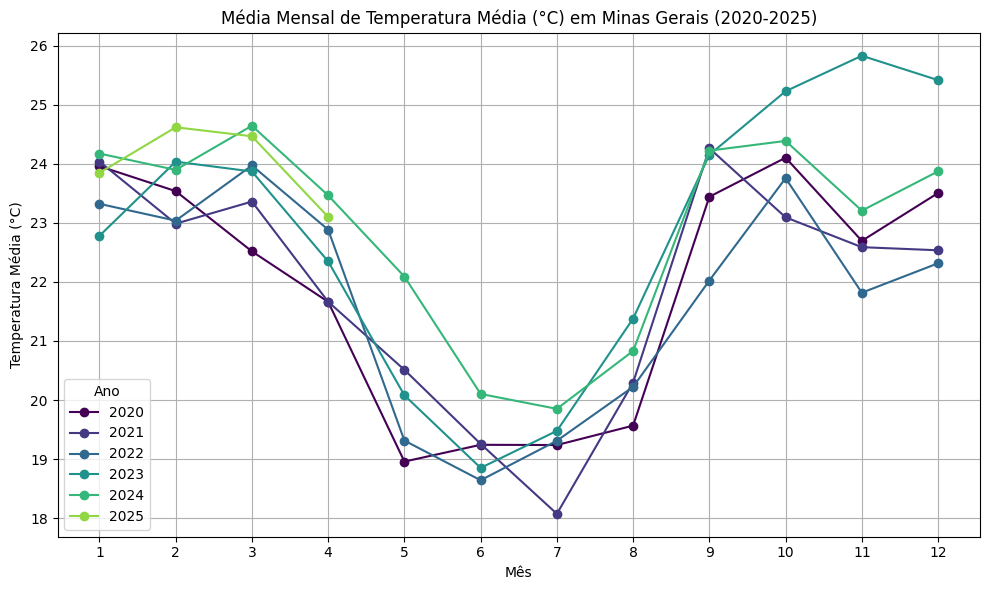

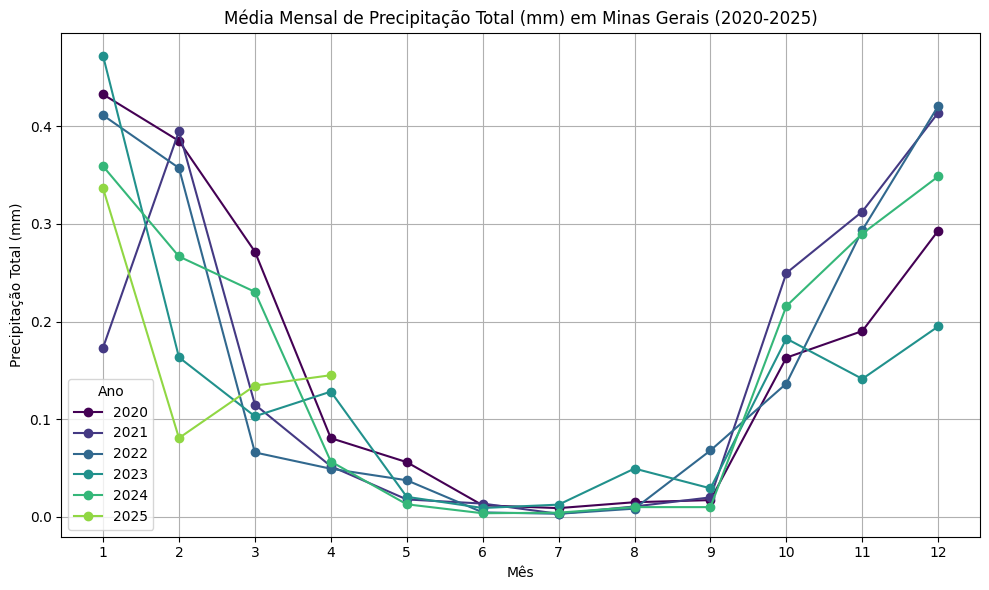

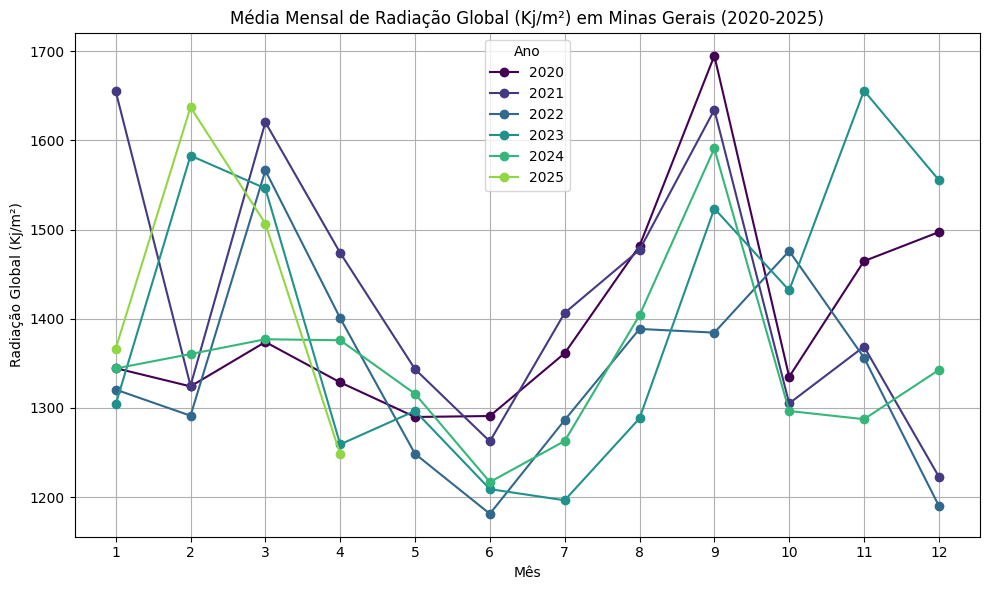

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Caminho para o arquivo unificado
caminho_arquivo_unificado = '/content/drive/MyDrive/medias_mensais_geo_temp_media_completo.csv'

try:
    # Ler o arquivo unificado
    df_unificado = pd.read_csv(caminho_arquivo_unificado)

    # Filtrar dados para Minas Gerais
    df_mg = df_unificado[df_unificado['Estado'] == 'MG']

    # Lista de anos únicas em MG
    anos_mg = sorted(df_mg['Ano'].unique())

    # Variáveis a serem plotadas
    variaveis = {
        'Temperatura Média (°C)': 'Temp_Media',
        'Precipitação Total (mm)': 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
        'Radiação Global (Kj/m²)': 'RADIACAO GLOBAL (Kj/m²)'
    }

    # Cores para os anos
    cores_anos = {ano: plt.cm.viridis(i / len(anos_mg)) for i, ano in enumerate(anos_mg)}

    # --- Gerar um gráfico para cada variável para Minas Gerais ---
    for nome_var, coluna_var in variaveis.items():
        plt.figure(figsize=(10, 6))
        for ano in anos_mg:
            df_ano_mg = df_mg[df_mg['Ano'] == ano].groupby('Mês')[coluna_var].mean()
            if not df_ano_mg.empty:
                plt.plot(df_ano_mg.index, df_ano_mg.values, marker='o', linestyle='-', color=cores_anos[ano], label=str(ano))

        plt.title(f'Média Mensal de {nome_var} em Minas Gerais (2020-2025)')
        plt.xlabel('Mês')
        plt.ylabel(nome_var)
        plt.xticks(range(1, 13))
        plt.grid(True)
        plt.legend(title='Ano')
        plt.tight_layout()
        plt.show()

except FileNotFoundError:
    print(f"Erro: O arquivo '{caminho_arquivo_unificado}' não foi encontrado.")
except KeyError as e:
    print(f"Erro: A coluna '{e}' não foi encontrada no arquivo CSV.")
except Exception as e:
    print(f"Ocorreu um erro ao gerar os gráficos: {e}")

In [ ]:
import os
import glob
import pandas as pd

def contar_linhas_csv(pasta):
    """Conta o número de linhas de todos os arquivos CSV em uma pasta."""
    total_linhas = 0
    arquivos_csv = glob.glob(os.path.join(pasta, '*.CSV'))
    arquivos_csv.extend(glob.glob(os.path.join(pasta, '*.csv'))) # Inclui arquivos com extensão minúscula

    for arquivo in arquivos_csv:
        try:
            # Tenta ler o arquivo com diferentes codificações
            with open(arquivo, 'r', encoding='latin1') as f:
                linhas = sum(1 for linha in f)
                total_linhas += linhas
                print(f"Arquivo: {os.path.basename(arquivo)}, Linhas: {linhas}")
        except UnicodeDecodeError:
            try:
                with open(arquivo, 'r', encoding='utf-8') as f:
                    linhas = sum(1 for linha in f)
                    total_linhas += linhas
                    print(f"Arquivo: {os.path.basename(arquivo)}, Linhas: {linhas}")
            except Exception as e:
                print(f"Erro ao ler {os.path.basename(arquivo)}: {e}")
        except Exception as e:
            print(f"Erro ao abrir {os.path.basename(arquivo)}: {e}")
    return total_linhas

# Define as pastas dos anos
pastas_anos = [
    '/content/drive/MyDrive/dataverse_files/2020',
    '/content/drive/MyDrive/dataverse_files/2021',
    '/content/drive/MyDrive/dataverse_files/2022',
    '/content/drive/MyDrive/dataverse_files/2023',
    '/content/drive/MyDrive/dataverse_files/2024',
    '/content/drive/MyDrive/dataverse_files/2025'
]

total_linhas_geral = 0

for pasta in pastas_anos:
    print(f"\n--- Contando linhas na pasta: {pasta} ---")
    total_linhas_pasta = contar_linhas_csv(pasta)
    total_linhas_geral += total_linhas_pasta
    print(f"Total de linhas na pasta {os.path.basename(pasta)}: {total_linhas_pasta}")

print(f"\n--- Contagem Final ---")
print(f"Total de linhas em todos os datasets (2020-2025): {total_linhas_geral}")


--- Contando linhas na pasta: /content/drive/MyDrive/dataverse_files/2020 ---
Arquivo: INMET_CO_GO_A026_MINEIROS_01-01-2020_A_31-12-2020.CSV, Linhas: 8793
Arquivo: INMET_CO_GO_A024_ALTO PARAISO DE GOIAS_01-01-2020_A_31-12-2020.CSV, Linhas: 8793
Arquivo: INMET_CO_GO_A025_RIO VERDE_01-01-2020_A_31-12-2020.CSV, Linhas: 8793
Arquivo: INMET_CO_GO_A022_GOIANESIA_01-01-2020_A_31-12-2020.CSV, Linhas: 8793
Arquivo: INMET_CO_GO_A023_CAIAPONIA_01-01-2020_A_31-12-2020.CSV, Linhas: 8793
Arquivo: INMET_CO_DF_A001_BRASILIA_01-01-2020_A_31-12-2020.CSV, Linhas: 8793
Arquivo: INMET_CO_GO_A017_POSSE_01-01-2020_A_31-12-2020.CSV, Linhas: 8793
Arquivo: INMET_CO_GO_A016_JATAI_01-01-2020_A_31-12-2020.CSV, Linhas: 8793
Arquivo: INMET_CO_GO_A014_GOIAS_01-01-2020_A_31-12-2020.CSV, Linhas: 8793
Arquivo: INMET_CO_GO_A015_ITAPACI_01-01-2020_A_31-12-2020.CSV, Linhas: 8793
Arquivo: INMET_CO_GO_A013_ARAGARCAS_01-01-2020_A_31-12-2020.CSV, Linhas: 8793
Arquivo: INMET_CO_GO_A012_LUZIANIA_01-01-2020_A_31-12-2020.CSV, Lin

## 2017

In [ ]:
pasta_2017 = '/content/drive/MyDrive/dataverse_files/2017'

In [ ]:
import pandas as pd
import glob
import os

# Caminho da pasta com os arquivos de 2017
pasta_2017 = '/content/drive/MyDrive/dataverse_files/2017' # Alterado para 2017
file_pattern = os.path.join(pasta_2017, '*.CSV')

all_files = glob.glob(file_pattern)
lista_dfs = []
erros_leitura = {}
colunas_nao_encontradas = {}

coluna_radiacao = 'RADIACAO GLOBAL (KJ/m²)'
coluna_precipitacao = 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'
coluna_temp_max = 'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'
coluna_temp_min = 'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)'
coluna_data = 'DATA (YYYY-MM-DD)' #alterei aqui

for filename in all_files:
    try:
        # Tenta ler o CSV com os parâmetros corretos
        df = pd.read_csv(filename, encoding='latin1', sep=';', skiprows=8, decimal=',')
        if df.empty:
            df = pd.read_csv(filename, encoding='utf-8', sep=';', skiprows=8, decimal=',')

        colunas_presentes = df.columns.tolist()

        if not df.empty and coluna_radiacao in colunas_presentes and coluna_precipitacao in colunas_presentes and coluna_temp_max in colunas_presentes and coluna_temp_min in colunas_presentes and coluna_data in colunas_presentes: #alterei aqui
            # Seleciona as colunas relevantes
            df_temp = df[[coluna_data, coluna_radiacao, coluna_precipitacao, coluna_temp_max, coluna_temp_min]].copy() #alterei aqui
            # Converte as colunas para numérico
            df_temp[coluna_radiacao] = pd.to_numeric(df_temp[coluna_radiacao], errors='coerce')
            df_temp[coluna_precipitacao] = pd.to_numeric(df_temp[coluna_precipitacao], errors='coerce')
            df_temp[coluna_temp_max] = pd.to_numeric(df_temp[coluna_temp_max], errors='coerce')
            df_temp[coluna_temp_min] = pd.to_numeric(df_temp[coluna_temp_min], errors='coerce')
            lista_dfs.append(df_temp)
        elif not df.empty:
            colunas_faltantes = []
            if coluna_radiacao not in colunas_presentes:
                colunas_faltantes.append(coluna_radiacao)
            if coluna_precipitacao not in colunas_presentes:
                colunas_faltantes.append(coluna_precipitacao)
            if coluna_temp_max not in colunas_presentes:
                colunas_faltantes.append(coluna_temp_max)
            if coluna_temp_min not in colunas_presentes:
                colunas_faltantes.append(coluna_temp_min)
            if coluna_data not in colunas_presentes: #alterei aqui
                colunas_faltantes.append(coluna_data) #alterei aqui
            colunas_nao_encontradas[filename] = f"Colunas não encontradas: {', '.join(colunas_faltantes)}"
        else:
            erros_leitura[filename] = "Arquivo vazio ou leitura falhou com parâmetros comuns."

    except Exception as e:
        erros_leitura[filename] = str(e)

# Combina todos os DataFrames lidos com sucesso
if lista_dfs:
    df_final_2017 = pd.concat(lista_dfs, ignore_index=True)
    df_final_2017['Data'] = pd.to_datetime(df_final_2017['DATA (YYYY-MM-DD)'], format='%Y-%m-%d', errors='coerce') #alterei aqui

    if 'Data' in df_final_2017.columns: #alterei aqui
        media_mensal_2017 = df_final_2017.groupby(df_final_2017['Data'].dt.month)[[coluna_radiacao, coluna_precipitacao, coluna_temp_max, coluna_temp_min]].mean().reset_index()
        media_mensal_2017['Ano'] = 2017  # Adiciona a coluna do ano
        media_mensal_2017.rename(columns={'Data': 'Mês'}, inplace=True) # Renomeia a coluna para 'Mês'

        # Salva o DataFrame com as médias mensais em um arquivo CSV (novo nome para não sobrescrever)
        nome_arquivo_saida_2017_v2 = '/content/drive/MyDrive/medias_mensais_2017_v2.csv' #alterei aqui
        media_mensal_2017.to_csv(nome_arquivo_saida_2017_v2, index=False)
        print(f"\nMédias mensais de 2017 (com temp. max e min) salvas com sucesso em: {nome_arquivo_saida_2017_v2}") #alterei aqui

    else:
        print("Coluna 'Data' não encontrada para realizar a análise mensal e salvar.")

else:
    print("Nenhum arquivo CSV continha todas as colunas necessárias para análise.")

# Imprime informações sobre arquivos que não foram lidos
if erros_leitura:
    print("\nErros ao ler os seguintes arquivos:")
    for filename, erro in erros_leitura.items():
        print(f"- {filename}: {erro}")

# Imprime informações sobre arquivos onde as colunas não foram encontradas
if colunas_nao_encontradas:
    print("\nColunas não encontradas nos seguintes arquivos:")
    for filename, motivo in colunas_nao_encontradas.items():
        print(f"- {filename}: {motivo}")



Médias mensais de 2017 (com temp. max e min) salvas com sucesso em: /content/drive/MyDrive/medias_mensais_2017_v2.csv


In [ ]:
import pandas as pd
import glob
import os

# Caminho da pasta com os arquivos
pasta_2017 = '/content/drive/MyDrive/dataverse_files/2017' # Alterado para 2017
file_pattern = os.path.join(pasta_2017, '*.CSV')

all_files = glob.glob(file_pattern)
lista_dfs = []
erros_leitura = {}
colunas_nao_encontradas = {}

coluna_radiacao = 'RADIACAO GLOBAL (KJ/m²)'
coluna_chuva = 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'
coluna_temperatura = 'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'
coluna_data = 'DATA (YYYY-MM-DD)'

for filename in all_files:
    try:
        # Tenta ler o CSV com os parâmetros corretos
        df = pd.read_csv(filename, encoding='latin1', sep=';', skiprows=8, decimal=',')
        if df.empty:
            df = pd.read_csv(filename, encoding='utf-8', sep=';', skiprows=8, decimal=',')

        colunas_presentes = df.columns.tolist()

        if not df.empty and coluna_radiacao in colunas_presentes and coluna_chuva in colunas_presentes and coluna_temperatura in colunas_presentes and coluna_data in colunas_presentes: # alterei aqui
            # Seleciona as colunas relevantes
            df_temp = df[[coluna_data, coluna_radiacao, coluna_chuva, coluna_temperatura]].copy() # alterei aqui
            df_temp['Arquivo'] = os.path.basename(filename) # Adiciona o nome do arquivo
            # Converte as colunas para numérico
            df_temp[coluna_radiacao] = pd.to_numeric(df_temp[coluna_radiacao], errors='coerce')
            df_temp[coluna_chuva] = pd.to_numeric(df_temp[coluna_chuva], errors='coerce')
            df_temp[coluna_temperatura] = pd.to_numeric(df_temp[coluna_temperatura], errors='coerce')
            lista_dfs.append(df_temp)
        elif not df.empty:
            colunas_faltantes = []
            if coluna_radiacao not in colunas_presentes:
                colunas_faltantes.append(coluna_radiacao)
            if coluna_chuva not in colunas_presentes:
                colunas_faltantes.append(coluna_chuva)
            if coluna_temperatura not in colunas_presentes:
                colunas_faltantes.append(coluna_temperatura)
            if coluna_data not in colunas_presentes: # alterei aqui
                colunas_faltantes.append(coluna_data) # alterei aqui
            colunas_nao_encontradas[filename] = f"Colunas não encontradas: {', '.join(colunas_faltantes)}"
        else:
            erros_leitura[filename] = "Arquivo vazio ou leitura falhou com parâmetros comuns."

    except Exception as e:
        erros_leitura[filename] = str(e)

# Combina todos os DataFrames lidos com sucesso
if lista_dfs:
    df_final_2017 = pd.concat(lista_dfs, ignore_index=True)
    print(f"Total de arquivos lidos com sucesso (com as 3 colunas): {len(lista_dfs)}")
    print("\nPrimeiras linhas dos dados combinados:")
    print(df_final_2017.head())

    # Exemplo de análise: Média mensal de cada variável
    df_final_2017['Data'] = pd.to_datetime(df_final_2017['DATA (YYYY-MM-DD)'], format='%Y-%m-%d', errors='coerce') #alterei aqui
    if 'Data' in df_final_2017.columns: #alterei aqui
        media_mensal_2017 = df_final_2017.groupby(df_final_2017['Data'].dt.month)[[coluna_radiacao, coluna_chuva, coluna_temperatura]].mean()
        print("\nMédia mensal das variáveis para 2017 (agregado de todas as estações):")
        print(media_mensal_2017)
    else:
        print("Coluna 'Data' não encontrada para realizar a análise mensal.")

else:
    print("Nenhum arquivo CSV continha todas as 3 colunas.")

# Imprime informações sobre arquivos que não foram lidos
if erros_leitura:
    print("\nErros ao ler os seguintes arquivos:")
    for filename, erro in erros_leitura.items():
        print(f"- {filename}: {erro}")

# Imprime informações sobre arquivos onde as colunas não foram encontradas
if colunas_nao_encontradas:
    print("\nColunas não encontradas nos seguintes arquivos:")
    for filename, motivo in colunas_nao_encontradas.items():
        print(f"- {filename}: {motivo}")


Total de arquivos lidos com sucesso (com as 3 colunas): 563

Primeiras linhas dos dados combinados:
  DATA (YYYY-MM-DD)  RADIACAO GLOBAL (KJ/m²)  \
0        2017-01-01                  -9999.0   
1        2017-01-01                  -9999.0   
2        2017-01-01                  -9999.0   
3        2017-01-01                  -9999.0   
4        2017-01-01                  -9999.0   

   PRECIPITAÇÃO TOTAL, HORÁRIO (mm)  \
0                               0.0   
1                               0.0   
2                               0.0   
3                               0.0   
4                               0.0   

   TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)  \
0                                          22.6   
1                                          22.1   
2                                          22.6   
3                                          21.9   
4                                          21.5   

                                             Arquivo  
0  INMET_CO_GO

### qual ano quer gerar o codigo

In [ ]:
import pandas as pd

def criar_regiao_2(arquivo_csv):
    """
    Cria uma nova coluna 'REGIAO_2' em um DataFrame com base na coluna 'Estado',
    mapeando os estados para as regiões brasileiras.

    Args:
        arquivo_csv (str): Caminho para o arquivo CSV contendo os dados.

    Returns:
        pandas.DataFrame: O DataFrame original com a nova coluna 'REGIAO_2',
                          ou None se ocorrer um erro.
    """
    try:
        # Lê o arquivo CSV usando o pandas
        df = pd.read_csv(arquivo_csv)

        # Dicionário de mapeamento de estados para regiões
        regioes_por_estado = {
            'AC': 'Norte',
            'AM': 'Norte',
            'AP': 'Norte',
            'PA': 'Norte',
            'RO': 'Norte',
            'RR': 'Norte',
            'TO': 'Norte',
            'AL': 'Nordeste',
            'BA': 'Nordeste',
            'CE': 'Nordeste',
            'MA': 'Nordeste',
            'PB': 'Nordeste',
            'PE': 'Nordeste',
            'PI': 'Nordeste',
            'RN': 'Nordeste',
            'SE': 'Nordeste',
            'DF': 'Centro-Oeste',
            'GO': 'Centro-Oeste',
            'MT': 'Centro-Oeste',
            'MS': 'Centro-Oeste',
            'ES': 'Sudeste',
            'MG': 'Sudeste',
            'RJ': 'Sudeste',
            'SP': 'Sudeste',
            'PR': 'Sul',
            'RS': 'Sul',
            'SC': 'Sul'
        }

        # Cria a coluna 'REGIAO_2' usando o dicionário de mapeamento
        df['REGIAO_2'] = df['Estado'].map(regioes_por_estado)

        return df

    except FileNotFoundError:
        print(f"Erro: O arquivo '{arquivo_csv}' não foi encontrado.")
        return None
    except KeyError as e:
        print(f"Erro: A coluna '{e}' não foi encontrada no arquivo CSV.")
        return None
    except Exception as e:
        print(f"Ocorreu um erro ao processar o arquivo CSV: {e}")
        return None

if __name__ == "__main__":
    # Caminho para o arquivo CSV
    arquivo_csv = '/content/drive/MyDrive/dataverse_files/medias_mensais_geo_temp_media_2017.csv'

    # Chama a função para criar a coluna 'REGIAO_2'
    df_com_regiao_2 = criar_regiao_2(arquivo_csv)

    # Imprime o resultado
    if df_com_regiao_2 is not None:
        print("DataFrame com a coluna 'REGIAO_2' adicionada:")
        print(df_com_regiao_2.head())

        # Se desejar salvar o resultado em um novo arquivo CSV
        arquivo_saida = '/content/drive/MyDrive/medias_mensais_geo_temp_media_2017_com_regiao_2.csv'
        df_com_regiao_2.to_csv(arquivo_saida, index=False)
        print(f"Arquivo salvo com sucesso em: {arquivo_saida}")


DataFrame com a coluna 'REGIAO_2' adicionada:
         Regiao Estado  Mês  RADIACAO GLOBAL (KJ/m²)  \
0  Desconhecido     AC    1             -5858.396064   
1  Desconhecido     AC    2             -6318.990753   
2  Desconhecido     AC    3             -6505.181605   
3  Desconhecido     AC    4             -6843.293254   
4  Desconhecido     AC    5             -7453.265457   

   PRECIPITAÇÃO TOTAL, HORÁRIO (mm)  \
0                      -5158.619585   
1                      -5586.036735   
2                      -5690.490515   
3                      -6213.542540   
4                      -7812.167012   

   TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)  \
0                                -3485.519528   
1                                -4125.699575   
2                                -4247.590687   
3                                -4777.935714   
4                                -6430.135733   

   TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)   Temp_Media   Ano REGIAO_2  
0          

In [ ]:
import pandas as pd

def corrigir_e_salvar_csv(arquivo_entrada, arquivo_saida):
    """
    Corrige um arquivo CSV substituindo a coluna 'Regiao' pela coluna 'REGIAO_2' e salva o resultado em um novo arquivo.

    Args:
        arquivo_entrada (str): O caminho para o arquivo CSV de entrada.
        arquivo_saida (str): O caminho para o arquivo CSV de saída.
    """
    try:
        # Lê o arquivo CSV usando o pandas
        df = pd.read_csv(arquivo_entrada)

        # Verifica se a coluna 'REGIAO_2' existe
        if 'REGIAO_2' not in df.columns:
            print(f"Erro: A coluna 'REGIAO_2' não foi encontrada no arquivo de entrada: {arquivo_entrada}")
            return

        # Verifica se a coluna 'Regiao' existe
        if 'Regiao' not in df.columns:
            print(f"Aviso: A coluna 'Regiao' não foi encontrada no arquivo de entrada. Nada a substituir.")
            df.to_csv(arquivo_saida, index=False)  # Salva o DataFrame original
            print(f"Arquivo salvo com sucesso: {arquivo_saida}")
            return

        # Substitui a coluna 'Regiao' pela coluna 'REGIAO_2'
        df = df.drop(columns=['Regiao'])
        df = df.rename(columns={'REGIAO_2': 'Regiao'})

        # Salva o DataFrame modificado em um novo arquivo CSV
        df.to_csv(arquivo_saida, index=False)
        print(f"Arquivo corrigido e salvo com sucesso: {arquivo_saida}")

    except FileNotFoundError:
        print(f"Erro: O arquivo '{arquivo_entrada}' não foi encontrado.")
    except Exception as e:
        print(f"Ocorreu um erro ao processar o arquivo CSV: {e}")

if __name__ == "__main__":
    # Caminhos para os arquivos de entrada e saída
    arquivo_entrada = '/content/drive/MyDrive/medias_mensais_geo_temp_media_2017_com_regiao_2.csv'
    arquivo_saida = '/content/drive/MyDrive/medias_mensais_geo_temp_media_2017_corrigido.csv'

    # Chama a função para corrigir e salvar o arquivo CSV
    corrigir_e_salvar_csv(arquivo_entrada, arquivo_saida)


Arquivo corrigido e salvo com sucesso: /content/drive/MyDrive/medias_mensais_geo_temp_media_2017_corrigido.csv


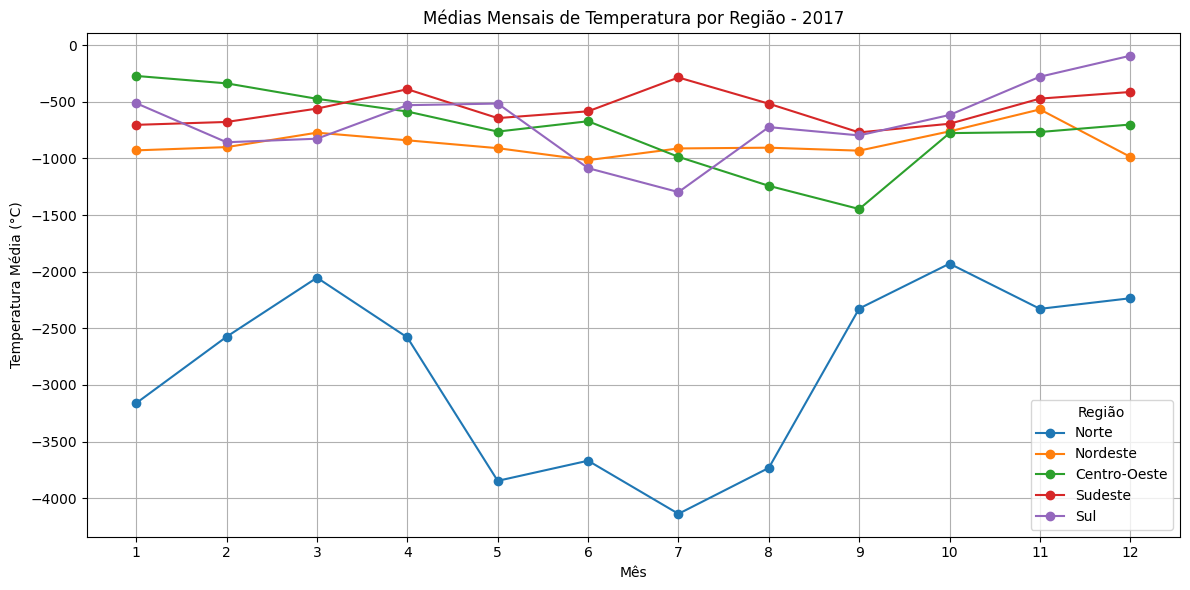

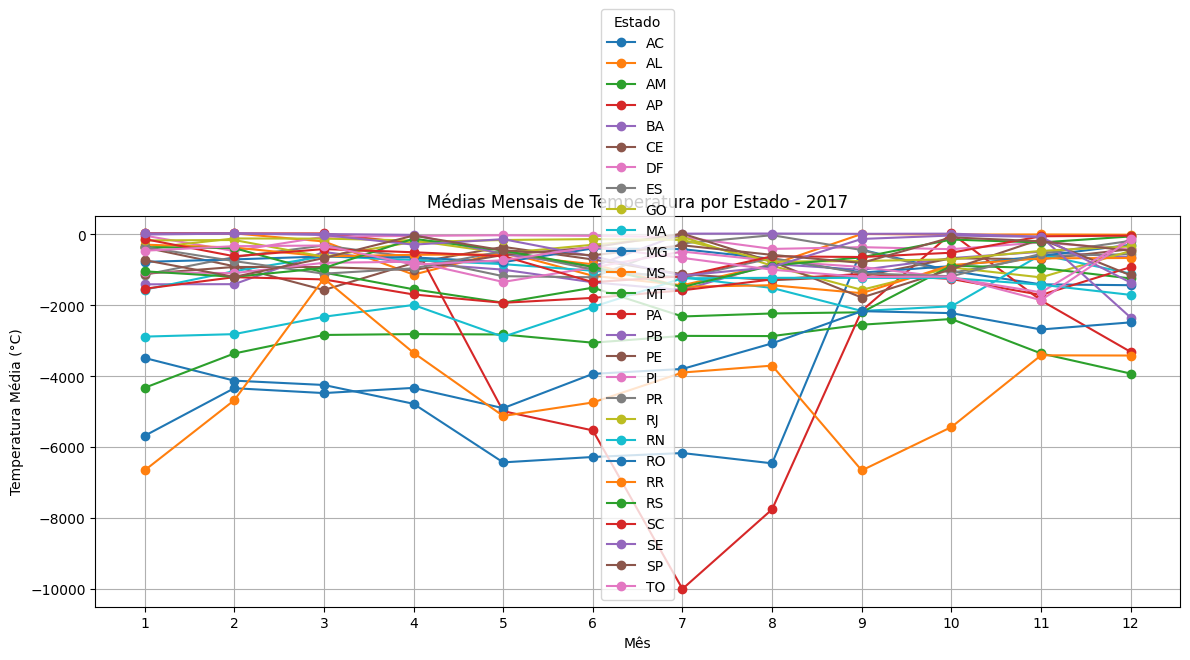

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def gerar_graficos_2017(arquivo_csv):
    """
    Gera gráficos a partir de um arquivo CSV, mostrando a média mensal de temperatura
    por região e estado para o ano de 2017.

    Args:
        arquivo_csv (str): Caminho para o arquivo CSV.
    """
    try:
        # Ler o arquivo CSV
        df_medias_geo = pd.read_csv(arquivo_csv)

        # Lista de regiões únicas
        regioes = df_medias_geo['Regiao'].unique()  # Alterado para 'Regiao'
        meses = df_medias_geo['Mês'].unique()
        meses.sort()  # Ordenar os meses para o eixo x

        # --- Gráficos por Região (Média Regional) ---
        plt.figure(figsize=(12, 6))
        for regiao in regioes:
            # Filtra o DataFrame para a região atual
            df_regiao = df_medias_geo[df_medias_geo['Regiao'] == regiao] # Alterado para 'Regiao'
            # Calcula a média da temperatura para cada mês dentro da região
            media_regional = df_regiao.groupby('Mês')['Temp_Media'].mean()
            plt.plot(media_regional.index, media_regional.values, marker='o', label=regiao)

        plt.title(f'Médias Mensais de Temperatura por Região - 2017')
        plt.xlabel('Mês')
        plt.ylabel('Temperatura Média (°C)')
        plt.xticks(meses)
        plt.grid(True)
        plt.legend(title='Região')  # Alterado para 'Região'
        plt.tight_layout()
        plt.show()

        # --- Gráficos por Estado (Média Estadual) ---
        plt.figure(figsize=(12, 6))
        estados = df_medias_geo['Estado'].unique()
        for estado in estados:
            df_estado = df_medias_geo[df_medias_geo['Estado'] == estado]
            media_estadual = df_estado.groupby('Mês')['Temp_Media'].mean()
            plt.plot(media_estadual.index, media_estadual.values, marker='o', label=estado)

        plt.title(f'Médias Mensais de Temperatura por Estado - 2017')
        plt.xlabel('Mês')
        plt.ylabel('Temperatura Média (°C)')
        plt.xticks(meses)
        plt.grid(True)
        plt.legend(title='Estado')
        plt.tight_layout()
        plt.show()

    except FileNotFoundError:
        print(f"Erro: O arquivo '{arquivo_csv}' não foi encontrado.")
    except KeyError as e:
        print(f"Erro: A coluna '{e}' não foi encontrada no arquivo CSV.")
    except Exception as e:
        print(f"Ocorreu um erro ao gerar os gráficos: {e}")

if __name__ == "__main__":
    arquivo_csv = '/content/drive/MyDrive/dataverse_files/medias_mensais_geo_temp_media_2017.csv' # Caminho correto do arquivo
    gerar_graficos_2017(arquivo_csv)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def gerar_graficos_prec_rad(arquivo_csv, arquivo_saida=""):
    """
    Gera gráficos separados de precipitação e radiação por região a partir de um arquivo CSV.

    Args:
        arquivo_csv (str): Caminho para o arquivo CSV.
        arquivo_saida (str, opcional): Caminho para salvar o DataFrame com as médias.
            Se não for especificado, o DataFrame não será salvo em arquivo.
    """
    try:
        # Carrega o dataset
        df = pd.read_csv(arquivo_csv)

        # Verifica se o DataFrame está vazio
        if df.empty:
            print("Erro: O DataFrame está vazio. Não há dados para plotar.")
            return

        # Verifica se as colunas necessárias estão presentes
        if 'Mês' not in df.columns or 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)' not in df.columns or 'RADIACAO GLOBAL (KJ/m²)' not in df.columns or 'Regiao' not in df.columns:
            print("Erro: O arquivo CSV não contém as colunas necessárias ('Mês', 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)', 'RADIACAO GLOBAL (KJ/m²)', 'Regiao').")
            return

        # Calcula a média por região
        df_regiao_media = df.groupby('Regiao')[['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)', 'RADIACAO GLOBAL (KJ/m²)']].mean().reset_index()

        # Lista de regiões únicas
        regioes = df_regiao_media['Regiao'].unique()

        # Garante que só serão exibidas 5 regiões
        if (len(regioes) > 5):
            regioes = regioes[:5]

        # Gráfico 1: Precipitação Total Média por Região
        plt.figure(figsize=(15, 8))
        for regiao in regioes:
            df_regiao = df_regiao_media[df_regiao['Regiao'] == regiao]
            plt.plot(df_regiao['Regiao'], df_regiao['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'], marker='o', linestyle='-', label=regiao)
        plt.title('Precipitação Total Média por Região em 2017 (Primeiras 5 Regiões)')
        plt.xlabel('Região')
        plt.ylabel('Precipitação Total (mm)')
        plt.xticks(df_regiao_media['Regiao'].unique())
        plt.grid(True)
        plt.legend(title='Região', loc='upper left')
        plt.tight_layout()
        plt.show()

        # Gráfico 2: Radiação Global Média por Região
        plt.figure(figsize=(15, 8))
        for regiao in regioes:
            df_regiao = df_regiao_media[df_regiao['Regiao'] == regiao]
            plt.plot(df_regiao['Regiao'], df_regiao['RADIACAO GLOBAL (KJ/m²)'], marker='o', linestyle='-', label=regiao)
        plt.title('Radiação Global Média por Região em 2017 (Primeiras 5 Regiões)')
        plt.xlabel('Região')
        plt.ylabel('Radiação Global (KJ/m²)')
        plt.xticks(df_regiao_media['Regiao'].unique())
        plt.grid(True)
        plt.legend(title='Região', loc='upper left')
        plt.tight_layout()
        plt.show()

        # Salva o DataFrame com as médias, se especificado
        if arquivo_saida:
            try:
                df_regiao_media.to_csv(arquivo_saida, index=False)
                print(f"DataFrame com as médias salvo em: {arquivo_saida}")
            except Exception as e:
                print(f"Erro ao salvar o arquivo: {e}")

        return df_regiao_media

    except FileNotFoundError:
        print(f"Erro: Arquivo não encontrado: {arquivo_csv}")
        return None
    except Exception as e:
        print(f"Erro ao gerar gráficos: {e}")
        return None

if __name__ == "__main__":
    arquivo_csv = '/content/drive/MyDrive/dataverse_files/medias_mensais_geo_temp_media_2017.csv'  # Caminho correto do arquivo
    arquivo_saida = '/content/drive/MyDrive/medias_regionais.csv' # Arquivo de saída
    df_media = gerar_graficos_prec_rad(arquivo_csv, arquivo_saida) # Agora a função retorna o DataFrame

    if df_media is not None:
        print("\nPrimeiras linhas do DataFrame com as médias:")
        print(df_media.head())


Erro ao gerar gráficos: cannot access local variable 'df_regiao' where it is not associated with a value


<Figure size 1500x800 with 0 Axes>

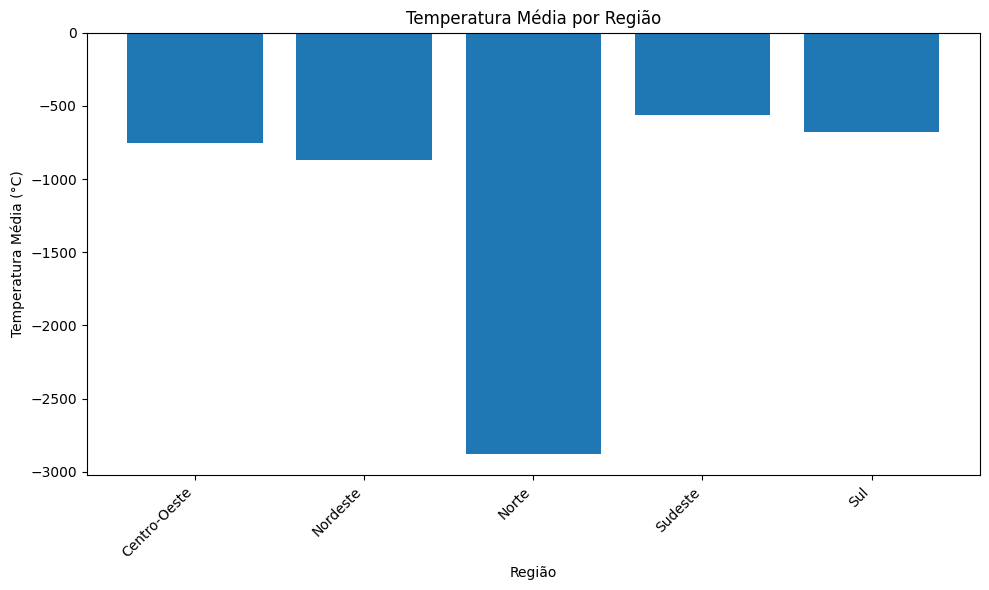

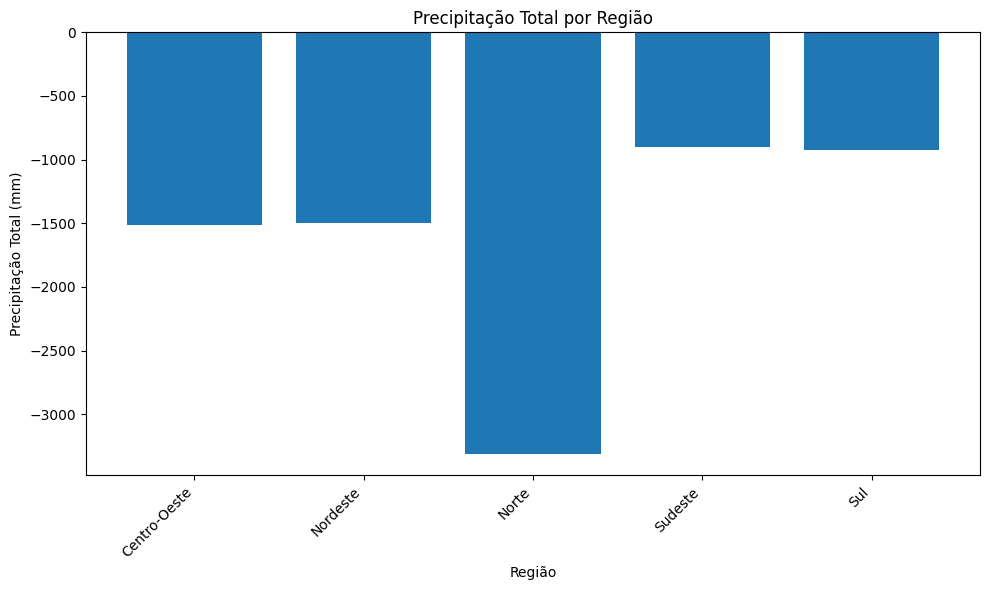

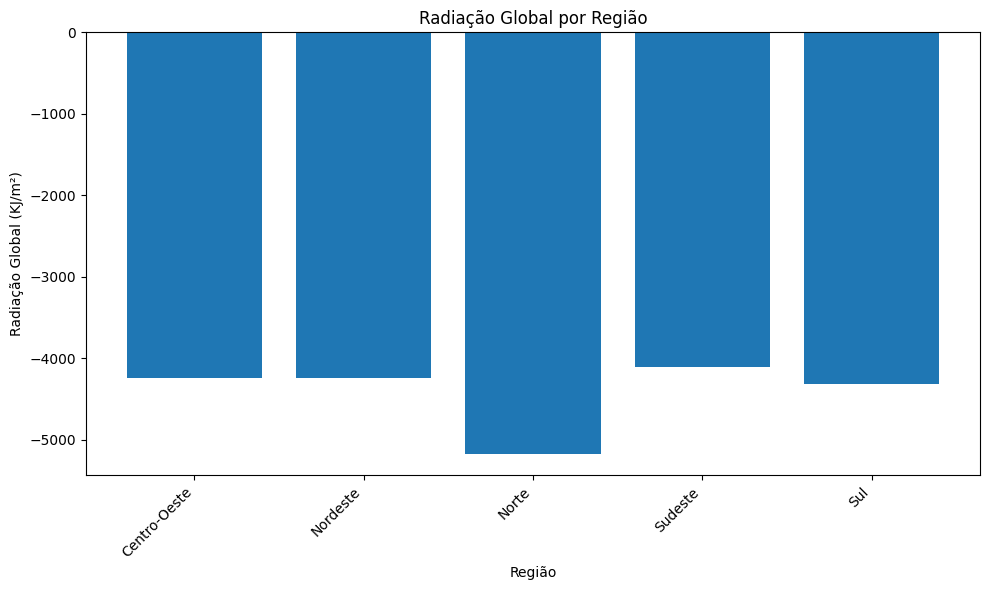

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def gerar_graficos(arquivo_csv):
    """
    Gera três gráficos a partir de um arquivo CSV, mostrando a média de temperatura,
    precipitação e radiação por região.

    Args:
        arquivo_csv (str): Caminho para o arquivo CSV contendo os dados.
    """
    try:
        # Carrega o arquivo CSV usando o pandas
        df = pd.read_csv(arquivo_csv)

        # Verifica se o DataFrame está vazio
        if df.empty:
            print("Erro: O DataFrame está vazio. Não há dados para plotar.")
            return

        # Verifica se as colunas necessárias estão presentes
        colunas_necessarias = ['Temp_Media', 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)', 'RADIACAO GLOBAL (KJ/m²)', 'Regiao']
        for coluna in colunas_necessarias:
            if coluna not in df.columns:
                print(f"Erro: O arquivo CSV não contém a coluna necessária: {coluna}")
                return

        # Calcula a média por região
        df_regiao_media = df.groupby('Regiao')[['Temp_Media', 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)', 'RADIACAO GLOBAL (KJ/m²)']].mean().reset_index()

        # 1. Gráfico de barras: Temperatura Média por Região
        plt.figure(figsize=(10, 6))
        plt.bar(df_regiao_media['Regiao'], df_regiao_media['Temp_Media'])
        plt.title('Temperatura Média por Região')
        plt.xlabel('Região')
        plt.ylabel('Temperatura Média (°C)')
        plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor legibilidade
        plt.tight_layout()
        plt.show()

        # 2. Gráfico de barras: Precipitação Total por Região
        plt.figure(figsize=(10, 6))
        plt.bar(df_regiao_media['Regiao'], df_regiao_media['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'])
        plt.title('Precipitação Total por Região')
        plt.xlabel('Região')
        plt.ylabel('Precipitação Total (mm)')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

        # 3. Gráfico de barras: Radiação Global por Região
        plt.figure(figsize=(10, 6))
        plt.bar(df_regiao_media['Regiao'], df_regiao_media['RADIACAO GLOBAL (KJ/m²)'])
        plt.title('Radiação Global por Região')
        plt.xlabel('Região')
        plt.ylabel('Radiação Global (KJ/m²)')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

    except FileNotFoundError:
        print(f"Erro: O arquivo '{arquivo_csv}' não foi encontrado.")
    except Exception as e:
        print(f"Ocorreu um erro ao processar o arquivo CSV: {e}")

if __name__ == "__main__":
    # Caminho para o arquivo CSV
    arquivo_csv = '/content/drive/MyDrive/dataverse_files/medias_mensais_geo_temp_media_2017.csv'

    # Chama a função para gerar os gráficos
    gerar_graficos(arquivo_csv)


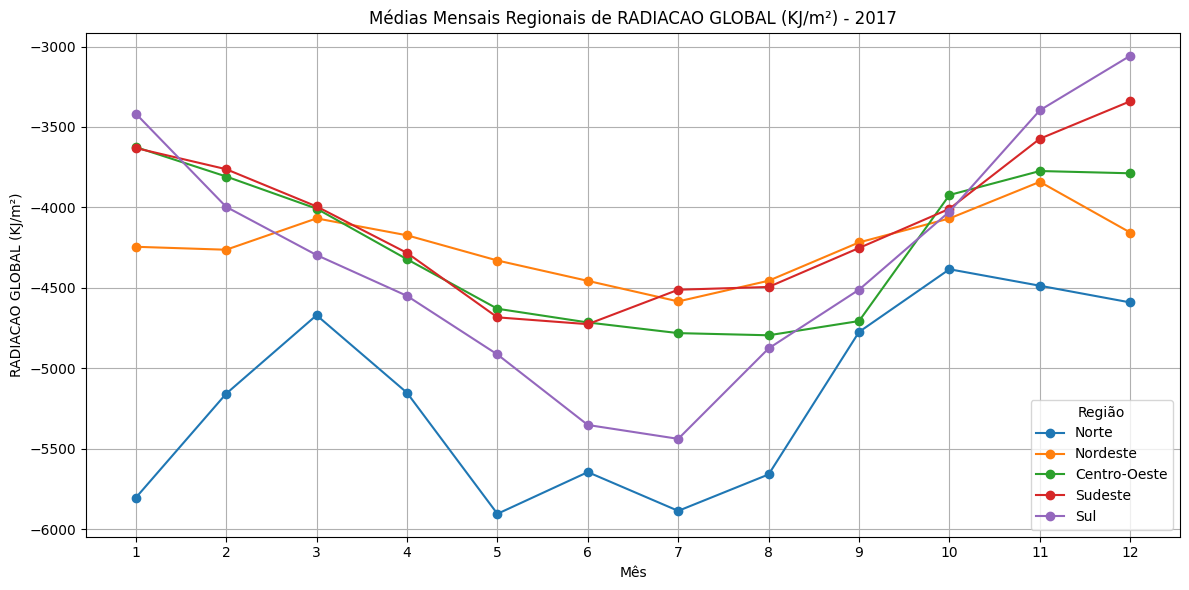

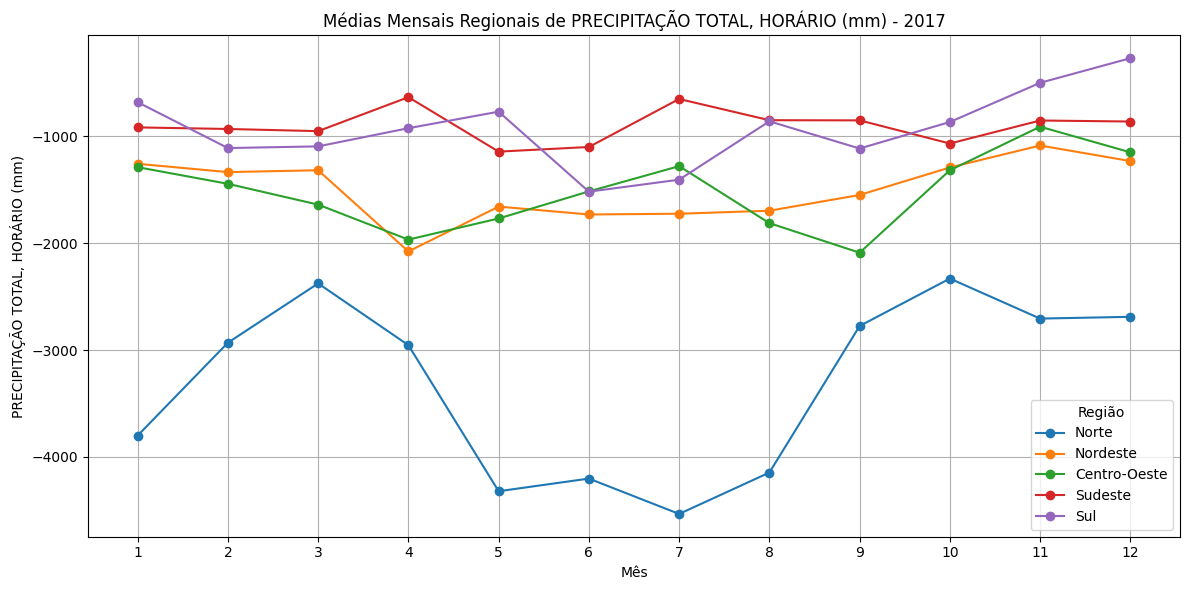

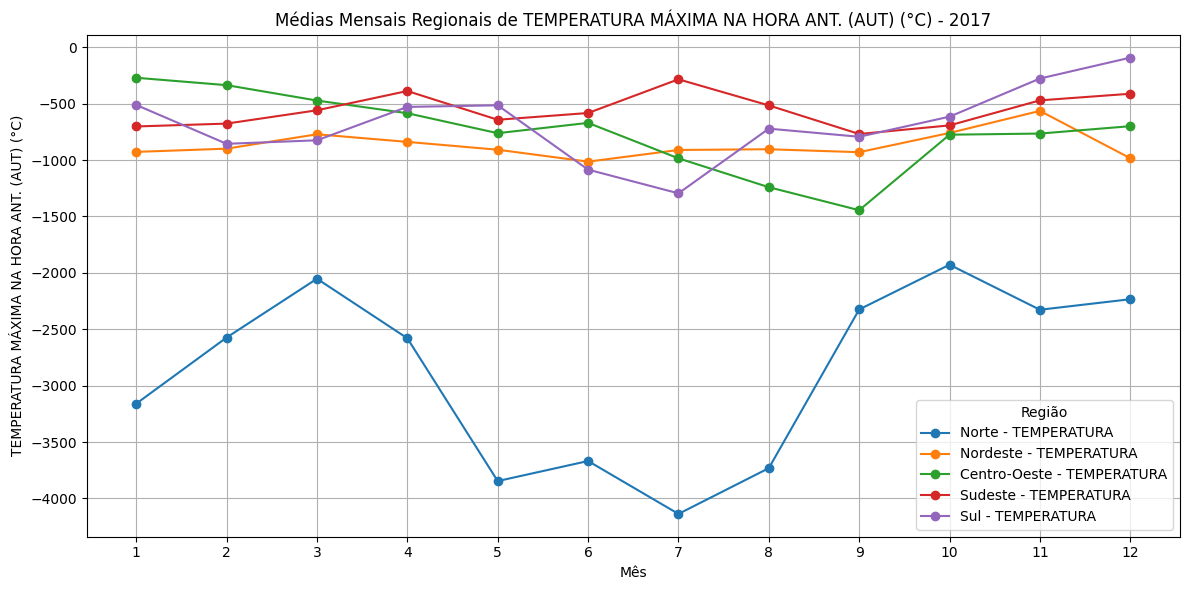

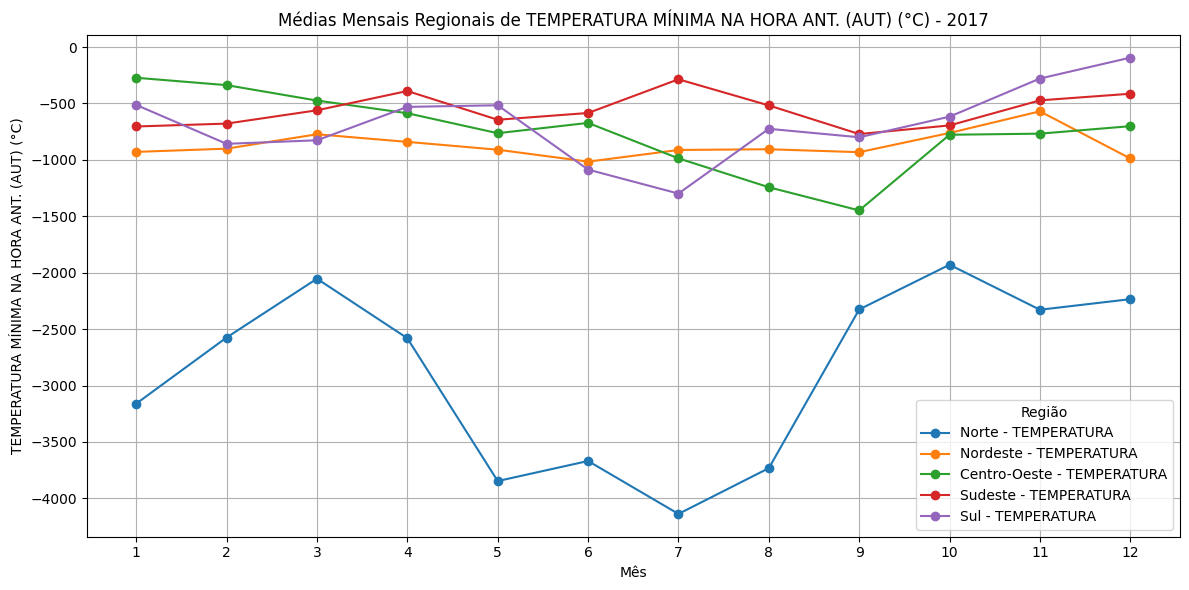

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Caminho do arquivo CSV com as médias mensais por região e estado
caminho_arquivo = '/content/drive/MyDrive/dataverse_files/medias_mensais_geo_temp_media_2017.csv' # Alterei o caminho do arquivo

try:
    # Ler o arquivo CSV
    df_medias_geo = pd.read_csv(caminho_arquivo)

    # Lista de regiões únicas
    regioes = df_medias_geo['Regiao'].unique()
    meses = df_medias_geo['Mês'].unique()
    meses.sort()  # Ordenar os meses para o eixo x

    # --- Gráficos por Região (Média Regional) ---
    for item in ['RADIACAO GLOBAL (KJ/m²)', 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
                 'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)',
                 'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)']:
        plt.figure(figsize=(12, 6))
        for regiao in regioes:
            # Filtra o DataFrame para a região atual
            df_regiao = df_medias_geo[df_medias_geo['Regiao'] == regiao]
            # Calcula a média da variável para cada mês dentro da região
            media_regional = df_regiao.groupby('Mês')[item].mean()
            if item.startswith('TEMPERATURA'):
                plt.plot(media_regional.index, media_regional.values, marker='o',
                         label=f'{regiao} - {item.split(" ")[0]}')
            else:
                plt.plot(media_regional.index, media_regional.values, marker='o', label=regiao)

        plt.title(f'Médias Mensais Regionais de {item} - 2017') # Alterei o ano para 2017
        plt.xlabel('Mês')
        plt.ylabel(item)
        plt.xticks(meses)
        plt.grid(True)
        plt.legend(title='Região')
        plt.tight_layout()
        plt.show()

except FileNotFoundError:
    print(f"Erro: O arquivo '{caminho_arquivo}' não foi encontrado.")
except KeyError as e:
    print(f"Erro: A coluna '{e}' não foi encontrada no arquivo CSV.")
except Exception as e:
    print(f"Ocorreu um erro ao gerar os gráficos: {e}")

# Arquivo utilizado '/content/drive/MyDrive/dataverse_files/medias_mensais_geo_temp_media_2017.csv'


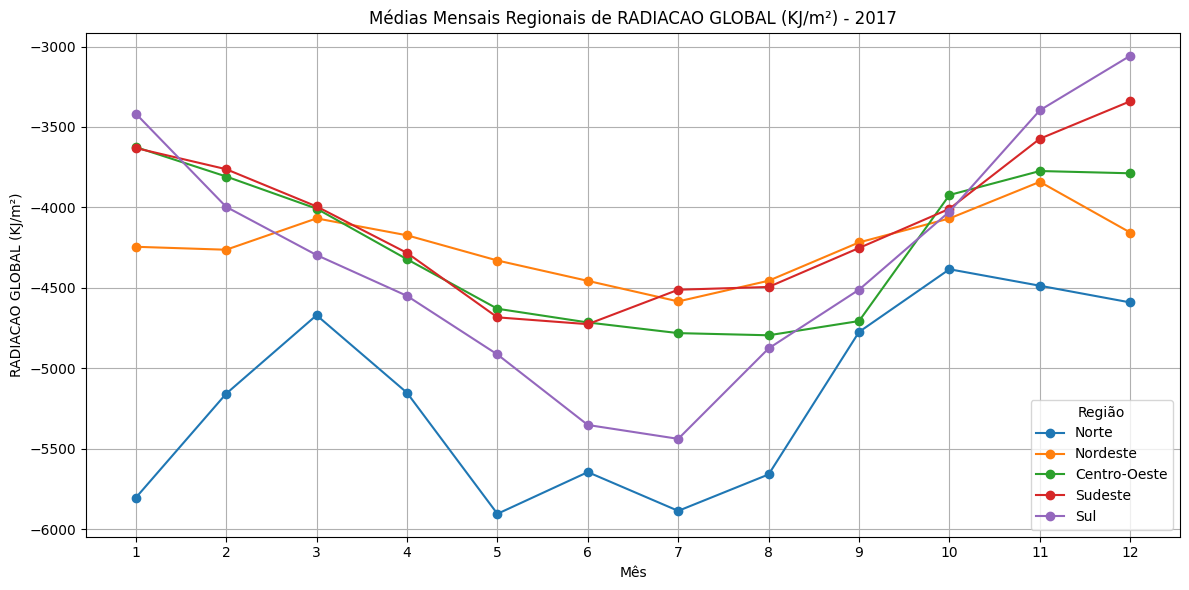

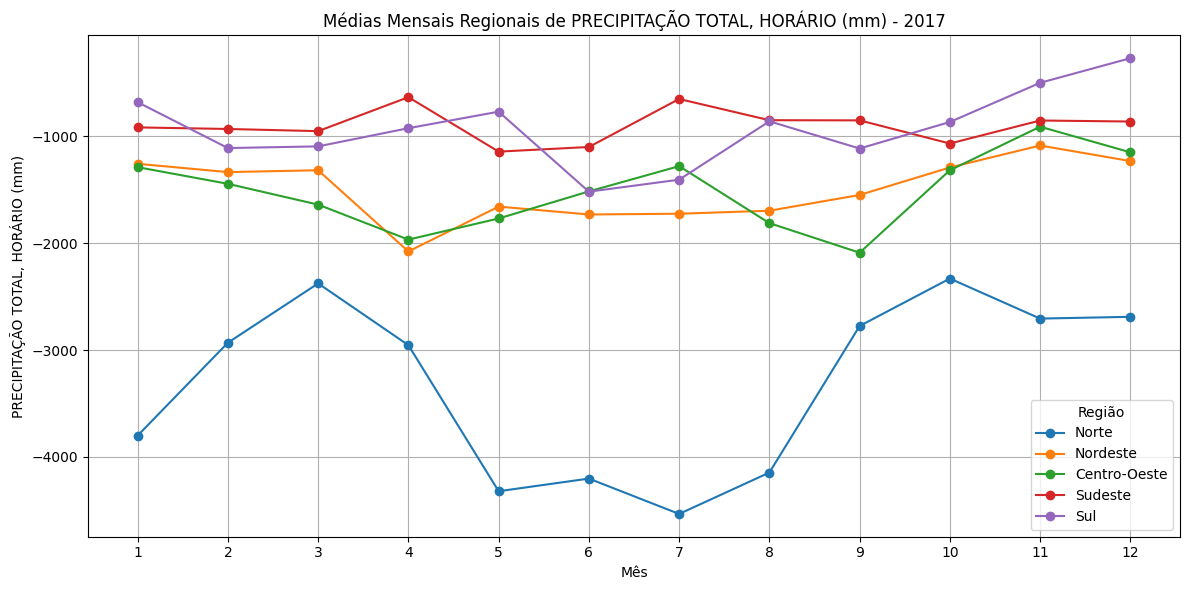

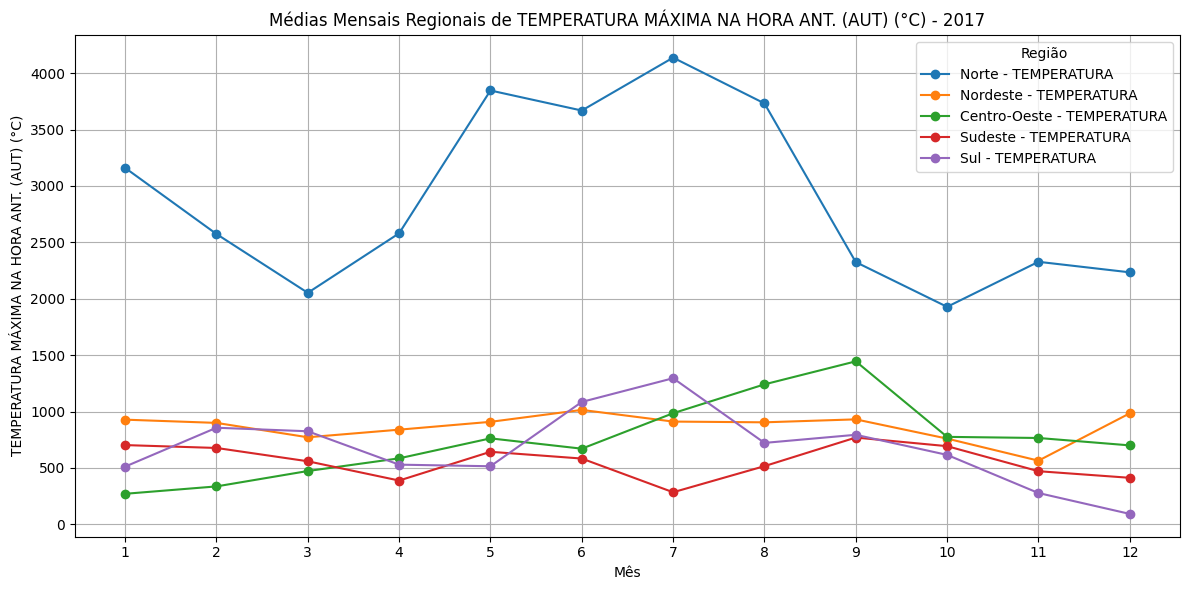

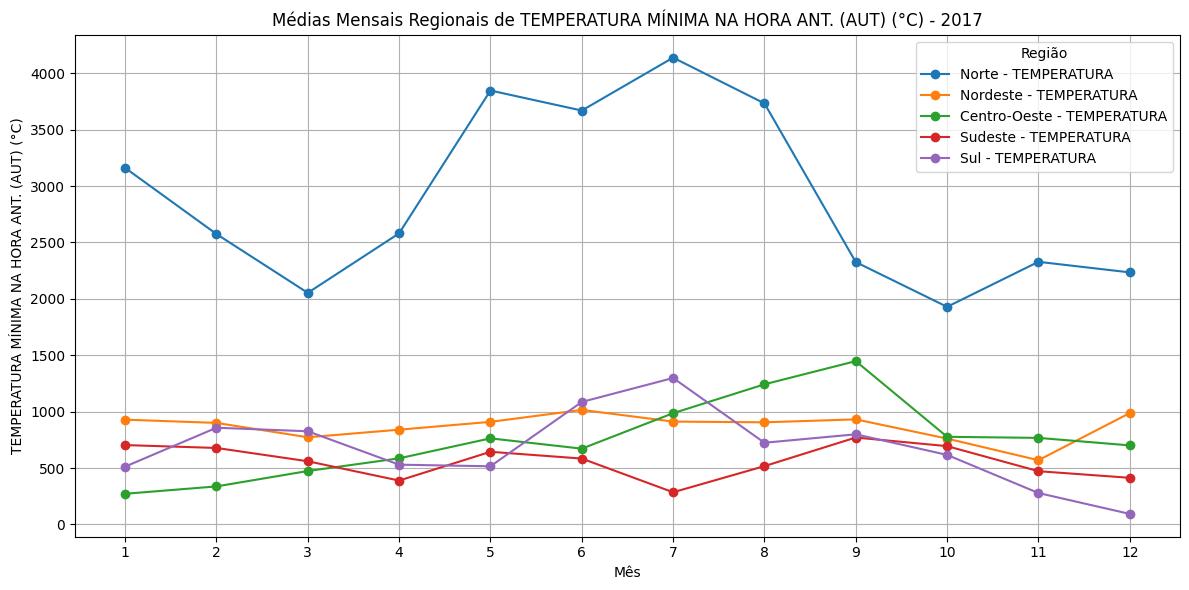

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Caminho do arquivo CSV com as médias mensais por região e estado
caminho_arquivo = '/content/drive/MyDrive/dataverse_files/medias_mensais_geo_temp_media_2017.csv'  # Alterei o caminho do arquivo

try:
    # Ler o arquivo CSV
    df_medias_geo = pd.read_csv(caminho_arquivo)

    # Lista de regiões únicas
    regioes = df_medias_geo['Regiao'].unique()
    meses = df_medias_geo['Mês'].unique()
    meses.sort()  # Ordenar os meses para o eixo x

    # --- Gráficos por Região (Média Regional) ---
    for item in ['RADIACAO GLOBAL (KJ/m²)', 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
                 'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)',
                 'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)']:
        plt.figure(figsize=(12, 6))
        for regiao in regioes:
            # Filtra o DataFrame para a região atual
            df_regiao = df_medias_geo[df_medias_geo['Regiao'] == regiao]
            # Calcula a média da variável para cada mês dentro da região
            media_regional = df_regiao.groupby('Mês')[item].mean()

            # Correção: Verifica se a variável é de temperatura e aplica correção
            if item.startswith('TEMPERATURA'):
                # Aplica a correção para inverter o sinal dos valores de temperatura
                media_regional = media_regional.apply(lambda x: -x)  # Inverte o sinal

                plt.plot(media_regional.index, media_regional.values, marker='o',
                         label=f'{regiao} - {item.split(" ")[0]}')
            else:
                plt.plot(media_regional.index, media_regional.values, marker='o', label=regiao)

        plt.title(f'Médias Mensais Regionais de {item} - 2017')  # Alterei o ano para 2017
        plt.xlabel('Mês')
        plt.ylabel(item)
        plt.xticks(meses)
        plt.grid(True)
        plt.legend(title='Região')
        plt.tight_layout()
        plt.show()

except FileNotFoundError:
    print(f"Erro: O arquivo '{caminho_arquivo}' não foi encontrado.")
except KeyError as e:
    print(f"Erro: A coluna '{e}' não foi encontrada no arquivo CSV.")
except Exception as e:
    print(f"Ocorreu um erro ao gerar os gráficos: {e}")

# Arquivo utilizado '/content/drive/MyDrive/dataverse_files/medias_mensais_geo_temp_media_2017.csv'


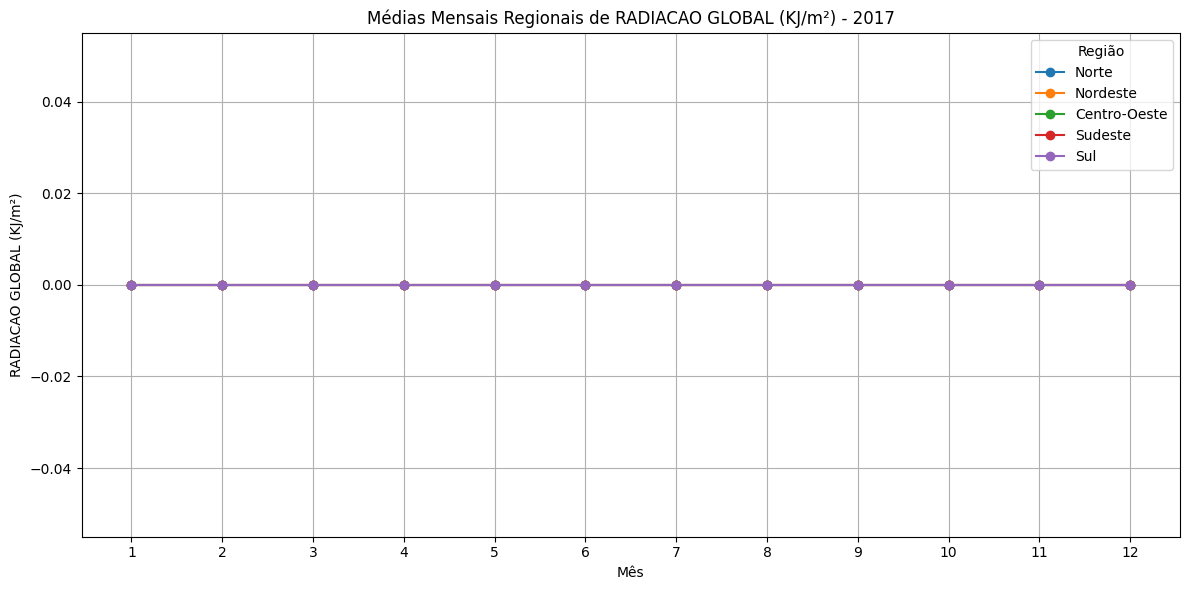

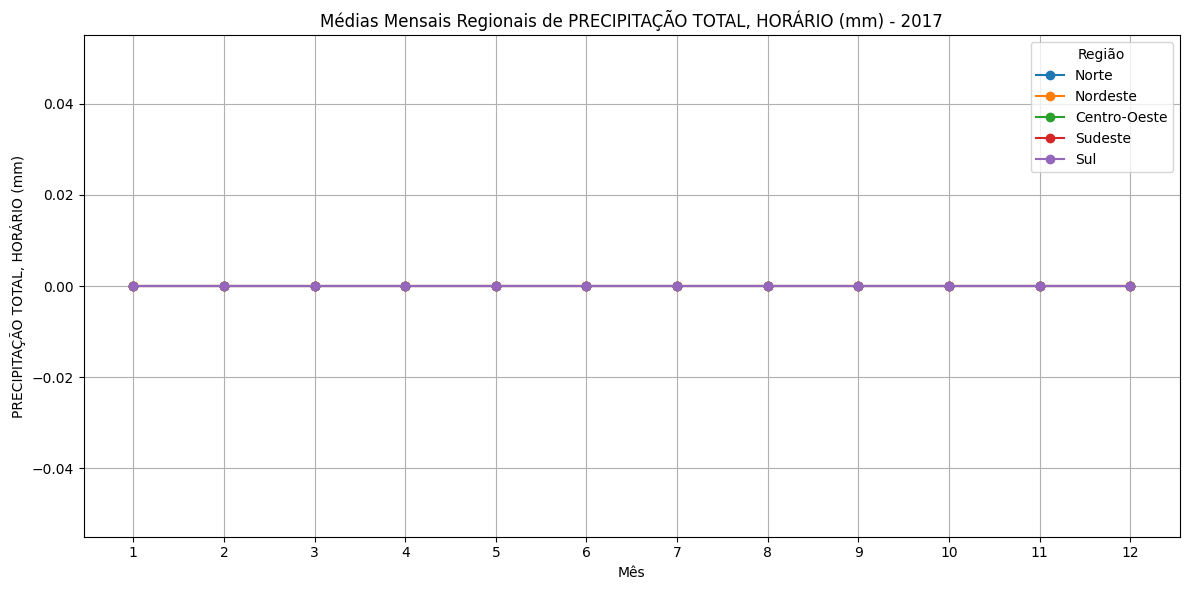

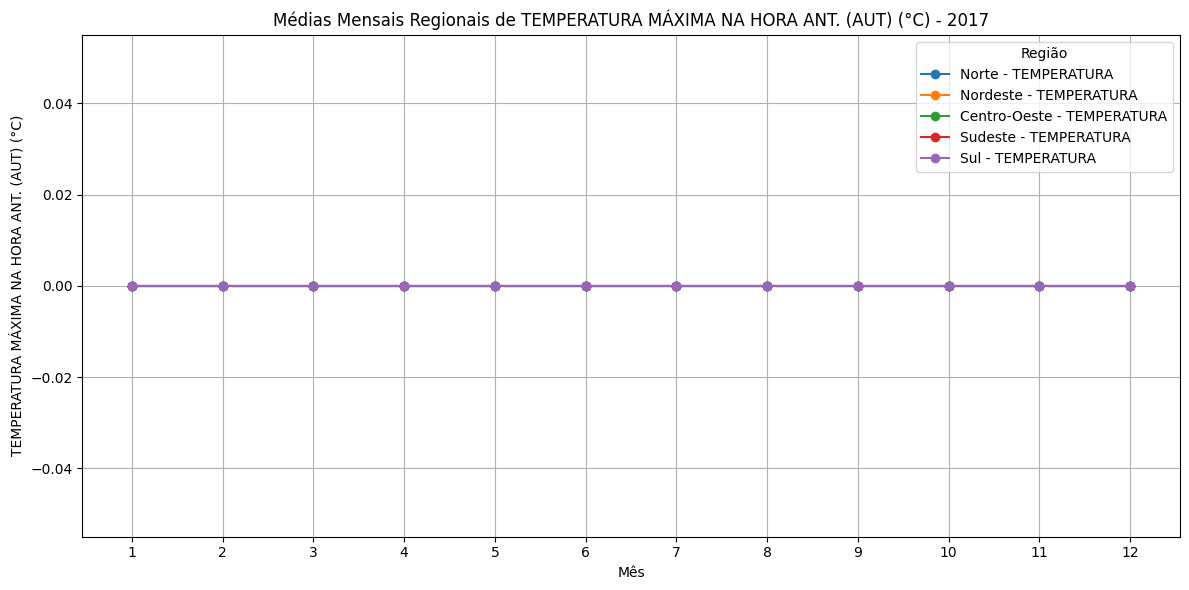

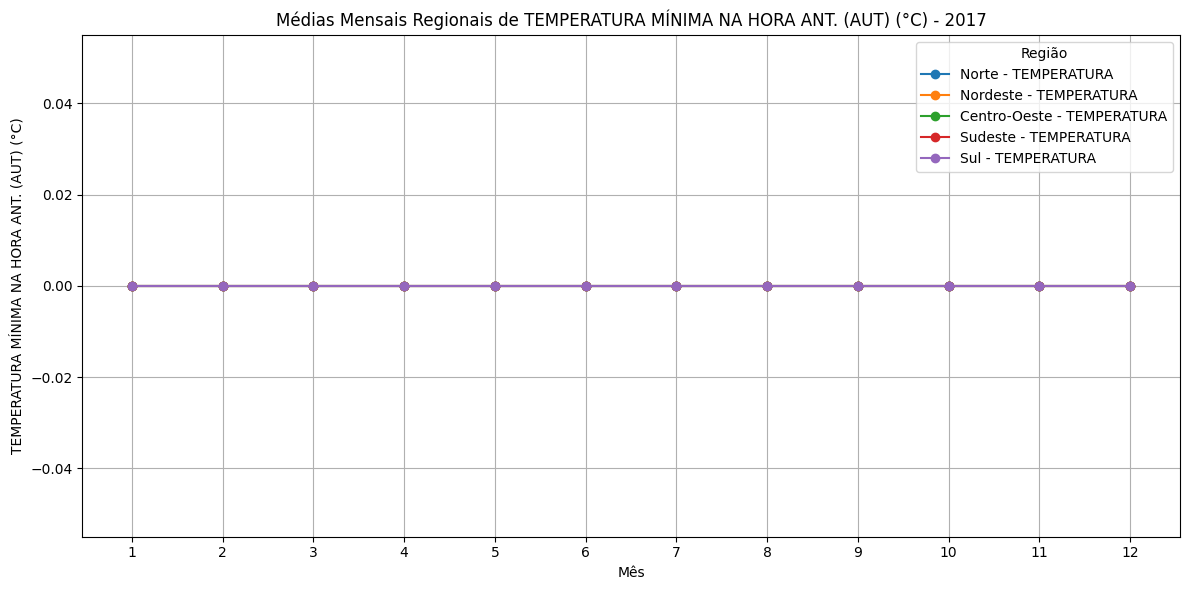

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Caminho do arquivo CSV com as médias mensais por região e estado
caminho_arquivo = '/content/drive/MyDrive/dataverse_files/medias_mensais_geo_temp_media_2017.csv'  # Alterei o caminho do arquivo

try:
    # Ler o arquivo CSV
    df_medias_geo = pd.read_csv(caminho_arquivo)

    # Lista de regiões únicas
    regioes = df_medias_geo['Regiao'].unique()
    meses = df_medias_geo['Mês'].unique()
    meses.sort()  # Ordenar os meses para o eixo x

    # --- Gráficos por Região (Média Regional) ---
    for item in ['RADIACAO GLOBAL (KJ/m²)', 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
                 'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)',
                 'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)']:
        plt.figure(figsize=(12, 6))
        for regiao in regioes:
            # Filtra o DataFrame para a região atual
            df_regiao = df_medias_geo[df_medias_geo['Regiao'] == regiao]
            # Calcula a média da variável para cada mês dentro da região
            media_regional = df_regiao.groupby('Mês')[item].mean()

            # Correção: Verifica se a variável é de temperatura e aplica correção
            if item.startswith('TEMPERATURA'):
                # Aplica a correção para converter para Celsius e garantir valores positivos
                media_regional = media_regional.apply(lambda x: x / 100 if x > 100 else x)  # Assume que valores > 100 estão em escala errada
                media_regional = media_regional.apply(lambda x: max(x, 0)) # Garante que a temperatura seja positiva

                plt.plot(media_regional.index, media_regional.values, marker='o',
                         label=f'{regiao} - {item.split(" ")[0]}')
            elif item == 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)':
                # Garante que a precipitação seja positiva
                media_regional = media_regional.apply(lambda x: max(x, 0))
                plt.plot(media_regional.index, media_regional.values, marker='o', label=regiao)
            elif item == 'RADIACAO GLOBAL (KJ/m²)':
                # Garante que a radiação seja positiva
                media_regional = media_regional.apply(lambda x: max(x, 0))
                plt.plot(media_regional.index, media_regional.values, marker='o', label=regiao)
            else:
                plt.plot(media_regional.index, media_regional.values, marker='o', label=regiao)

        plt.title(f'Médias Mensais Regionais de {item} - 2017')  # Alterei o ano para 2017
        plt.xlabel('Mês')
        plt.ylabel(item)
        plt.xticks(meses)
        plt.grid(True)
        plt.legend(title='Região')
        plt.tight_layout()
        plt.show()

except FileNotFoundError:
    print(f"Erro: O arquivo '{caminho_arquivo}' não foi encontrado.")
except KeyError as e:
    print(f"Erro: A coluna '{e}' não foi encontrada no arquivo CSV.")
except Exception as e:
    print(f"Ocorreu um erro ao gerar os gráficos: {e}")

# Arquivo utilizado '/content/drive/MyDrive/dataverse_files/medias_mensais_geo_temp_media_2017.csv'
